# Human Cost of Israel-Palestine Conflict (2000 - 2021) Analysis

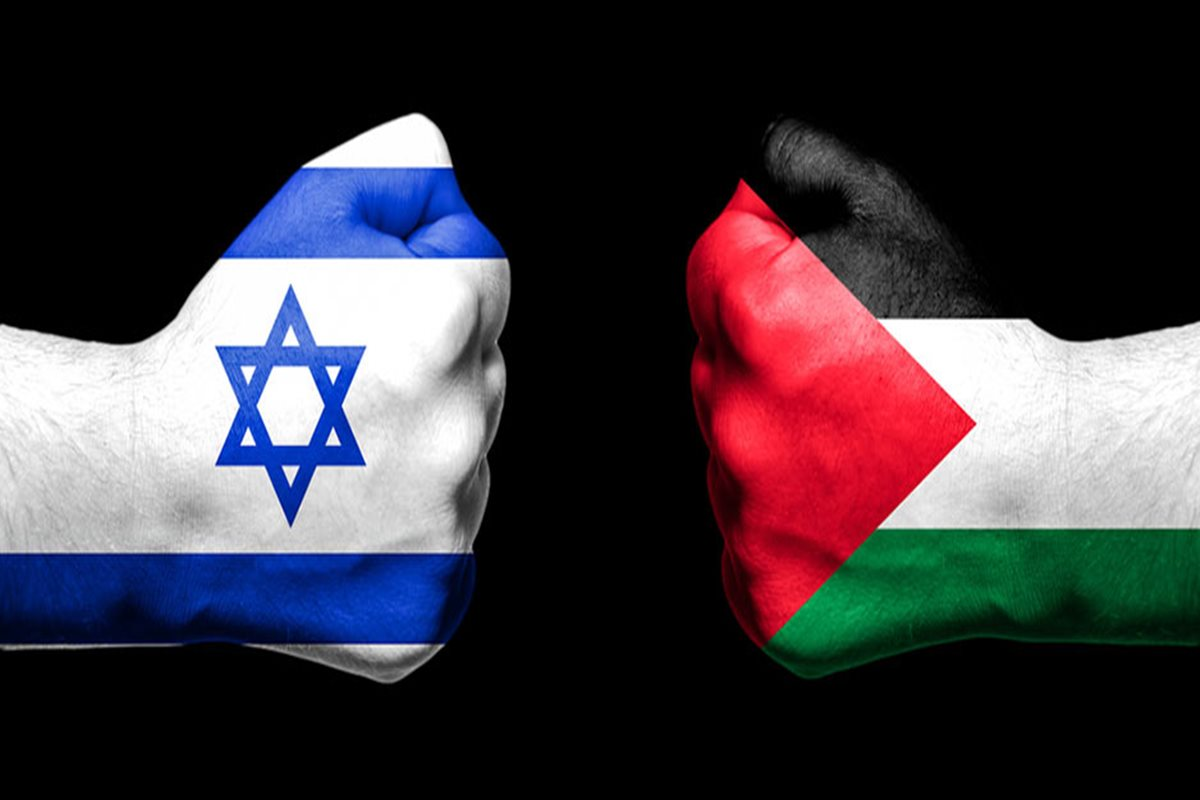

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\Govind\\Downloads\\israel_palestine_conflict.csv")


In [4]:
df.head()

Year      Month Palestinians Injuries Israelis Injuries  \
0  2000   DECEMBER                   781               NaN   
1  2000   NOVEMBER                  3838               NaN   
2  2000    OCTOBER                  5984               NaN   
3  2000  SEPTEMBER                   NaN               NaN   
4  2001   DECEMBER                   304               NaN   

   Palestinians Killed  Israelis Killed  
0                   51                8  
1                  112               22  
2                  104               10  
3                   16                1  
4                   67               36

In [5]:
df.tail()

Year     Month Palestinians Injuries Israelis Injuries  \
244  2021   JANUARY                   NaN               NaN   
245  2021  FEBRUARY                   NaN               NaN   
246  2021     MARCH                   NaN               NaN   
247  2021     APRIL                   NaN               NaN   
248  2021       MAY                   NaN               NaN   

     Palestinians Killed  Israelis Killed  
244                    4                0  
245                    1                0  
246                    4                0  
247                    1                0  
248                   26                3

In [6]:
df.shape

(249, 6)

In [7]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Year                       0
Month                      0
Palestinians Injuries     54
Israelis Injuries        117
Palestinians Killed        0
Israelis Killed            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   249 non-null    int64 
 1   Month                  249 non-null    object
 2   Palestinians Injuries  195 non-null    object
 3   Israelis Injuries      132 non-null    object
 4   Palestinians Killed    249 non-null    int64 
 5   Israelis Killed        249 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 11.8+ KB


In [11]:
df = df.fillna({
    'Palestinians Injuries': '0',
    'Israelis Injuries': '0'
})

In [12]:
numerical_columns = ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']
df[numerical_columns] = df[numerical_columns].replace({',': ''}, regex=True)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [13]:
df

Year      Month  Palestinians Injuries  Israelis Injuries  \
0    2000   DECEMBER                  781.0                0.0   
1    2000   NOVEMBER                 3838.0                0.0   
2    2000    OCTOBER                 5984.0                0.0   
3    2000  SEPTEMBER                    0.0                0.0   
4    2001   DECEMBER                  304.0                0.0   
..    ...        ...                    ...                ...   
244  2021    JANUARY                    0.0                0.0   
245  2021   FEBRUARY                    0.0                0.0   
246  2021      MARCH                    0.0                0.0   
247  2021      APRIL                    0.0                0.0   
248  2021        MAY                    0.0                0.0   

     Palestinians Killed  Israelis Killed  
0                     51                8  
1                    112               22  
2                    104               10  
3                     16                1  
4                     67               36  
..                   ...              ...  
244                    4                0  
245                    1                0  
246                    4                0  
247                    1                0  
248                   26                3  

[249 rows x 6 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  247 non-null    float64
 3   Israelis Injuries      247 non-null    float64
 4   Palestinians Killed    249 non-null    int64  
 5   Israelis Killed        249 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 11.8+ KB


In [15]:
df.describe()

Year  Palestinians Injuries  Israelis Injuries  \
count   249.000000             247.000000         247.000000   
mean   2010.542169             451.315789          20.890688   
std       6.014702            1471.798713         150.387900   
min    2000.000000               0.000000           0.000000   
25%    2005.000000              61.500000           0.000000   
50%    2011.000000             161.000000           3.000000   
75%    2016.000000             302.500000          15.000000   
max    2021.000000           13735.000000        2347.000000   

       Palestinians Killed  Israelis Killed  
count           249.000000       249.000000  
mean             40.160643         5.120482  
std             129.148851        11.653323  
min               0.000000         0.000000  
25%               4.000000         0.000000  
50%              12.000000         1.000000  
75%              37.000000         5.000000  
max            1590.000000       122.000000

In [16]:
df.nunique()

Year                      22
Month                     14
Palestinians Injuries    169
Israelis Injuries         53
Palestinians Killed       77
Israelis Killed           33
dtype: int64

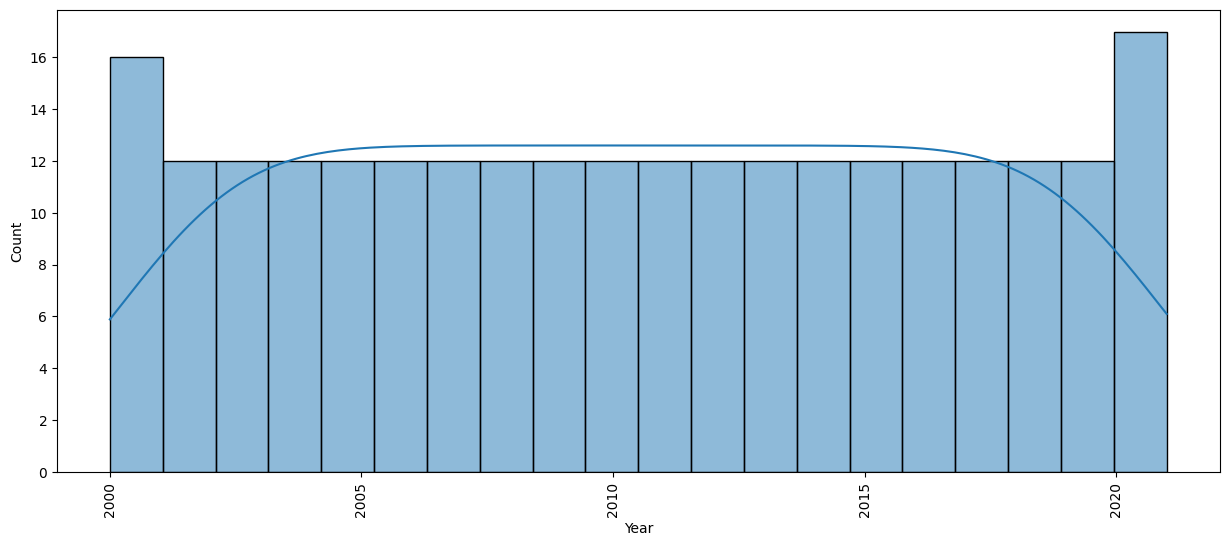

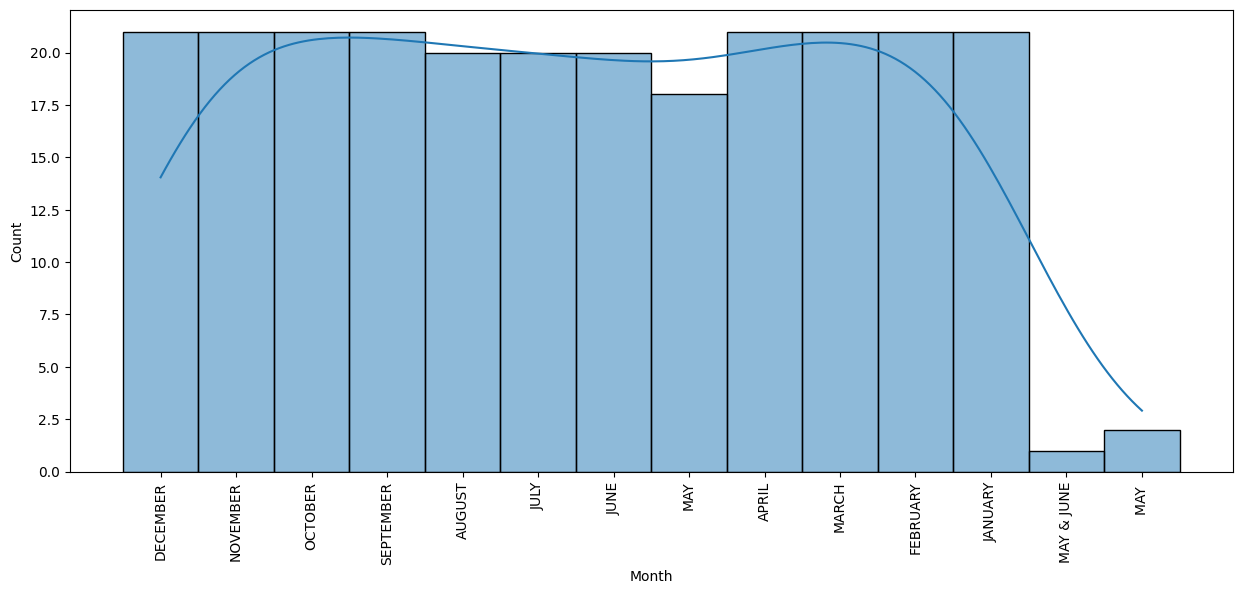

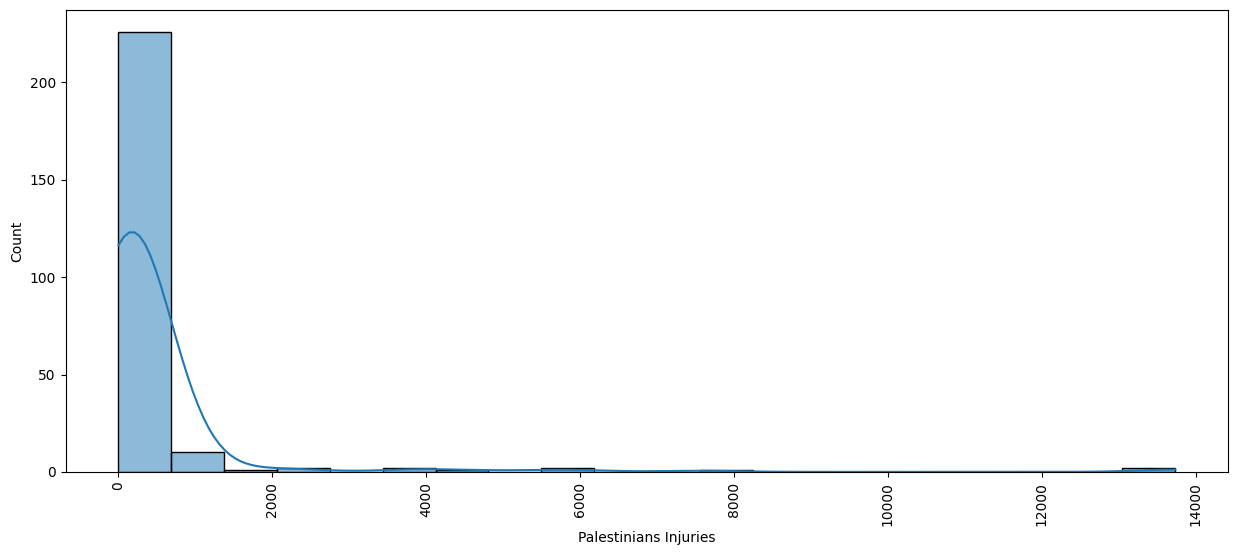

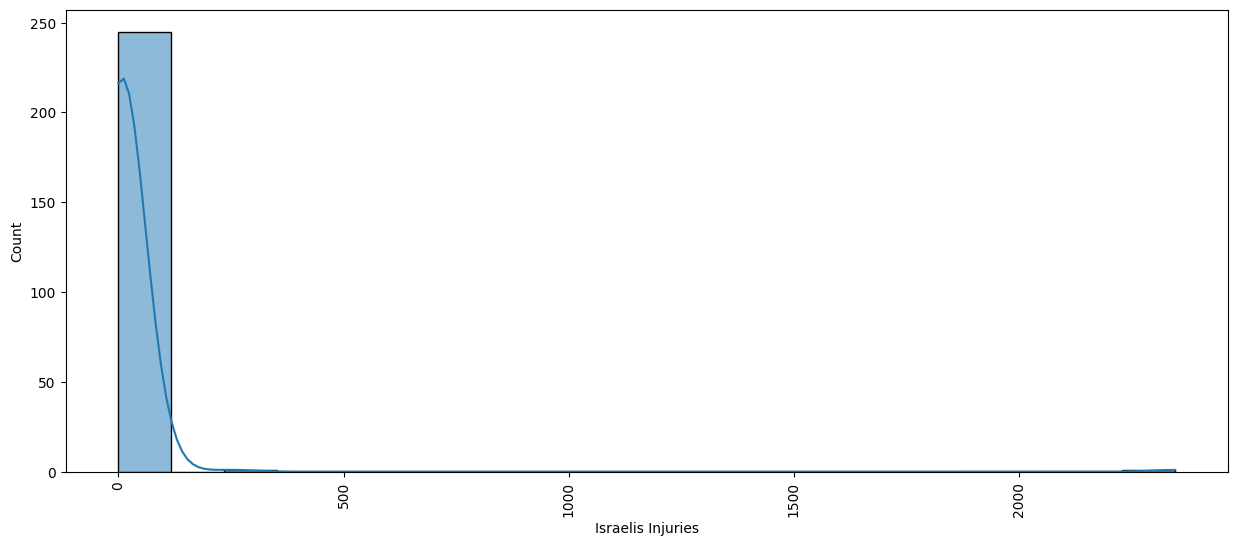

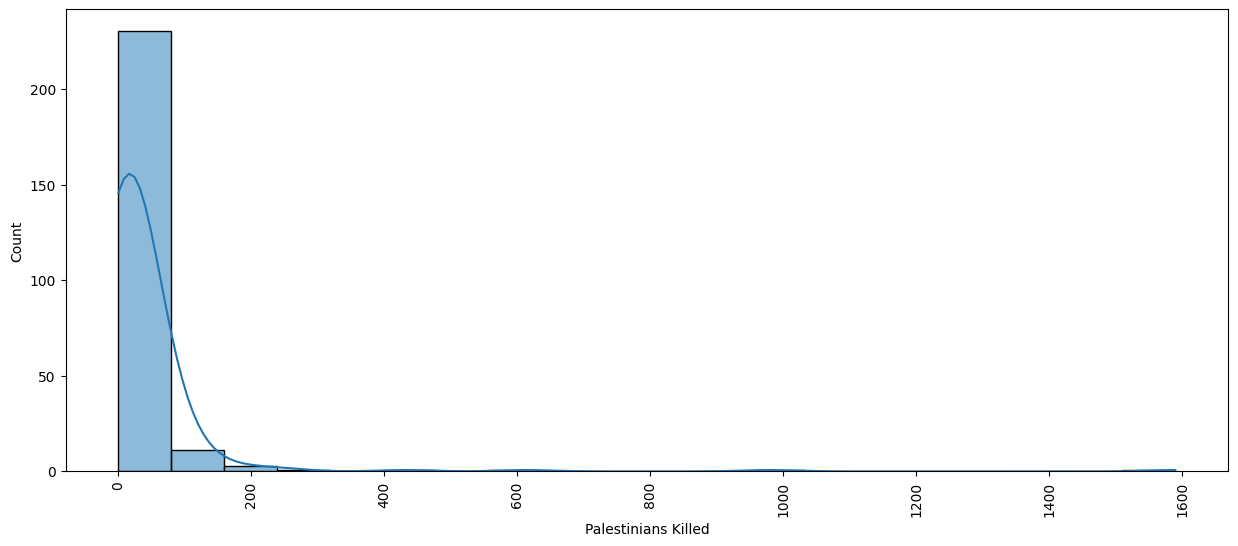

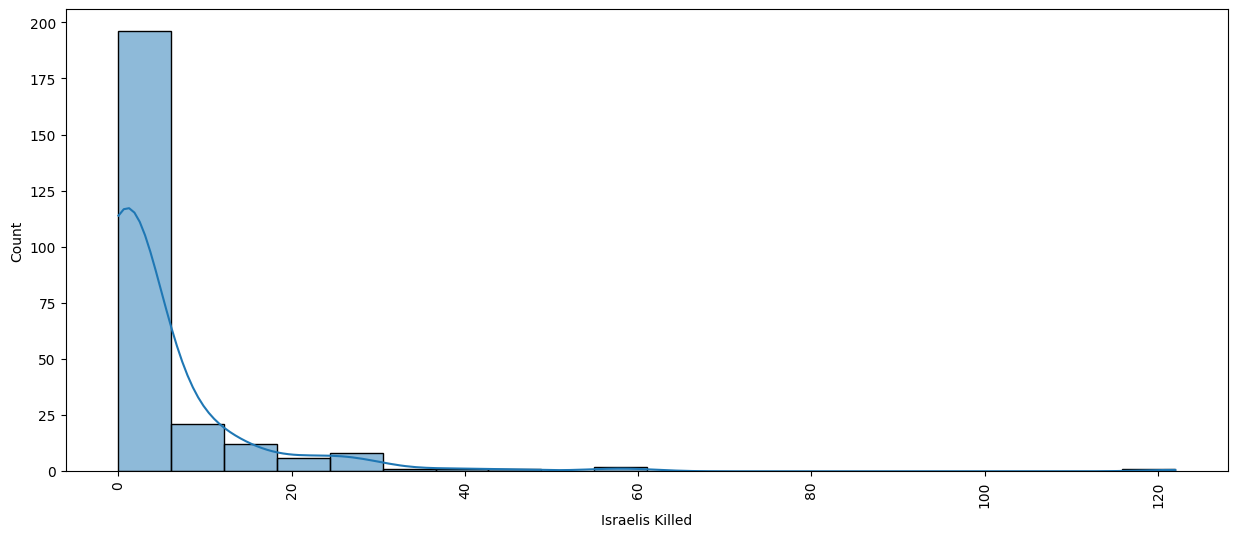

In [17]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [18]:
df1 = df[['Year', 'Palestinians Injuries', 'Israelis Injuries','Palestinians Killed', 
          'Israelis Killed']]

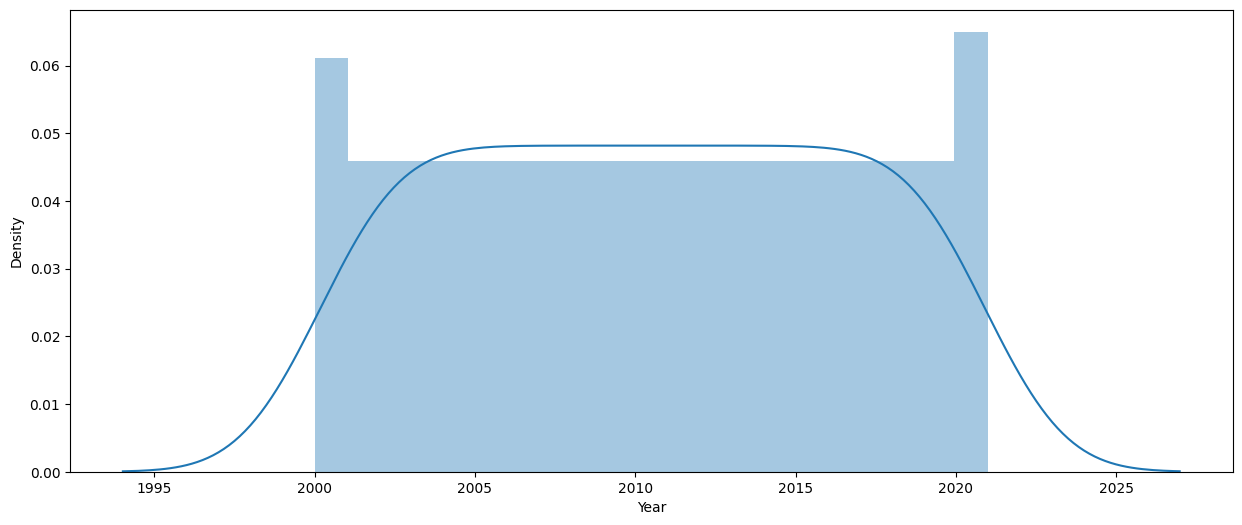

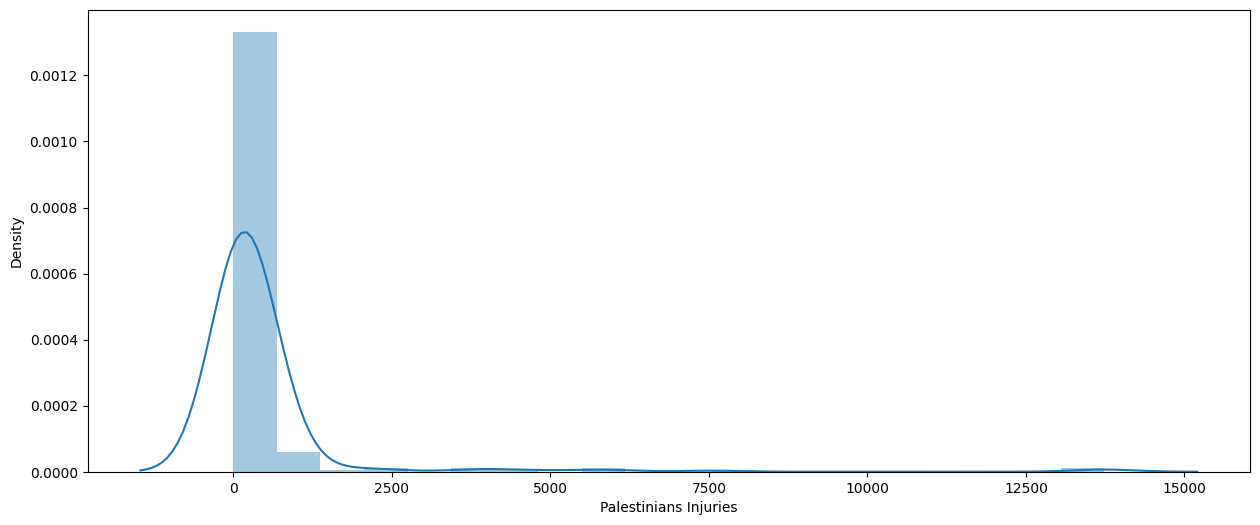

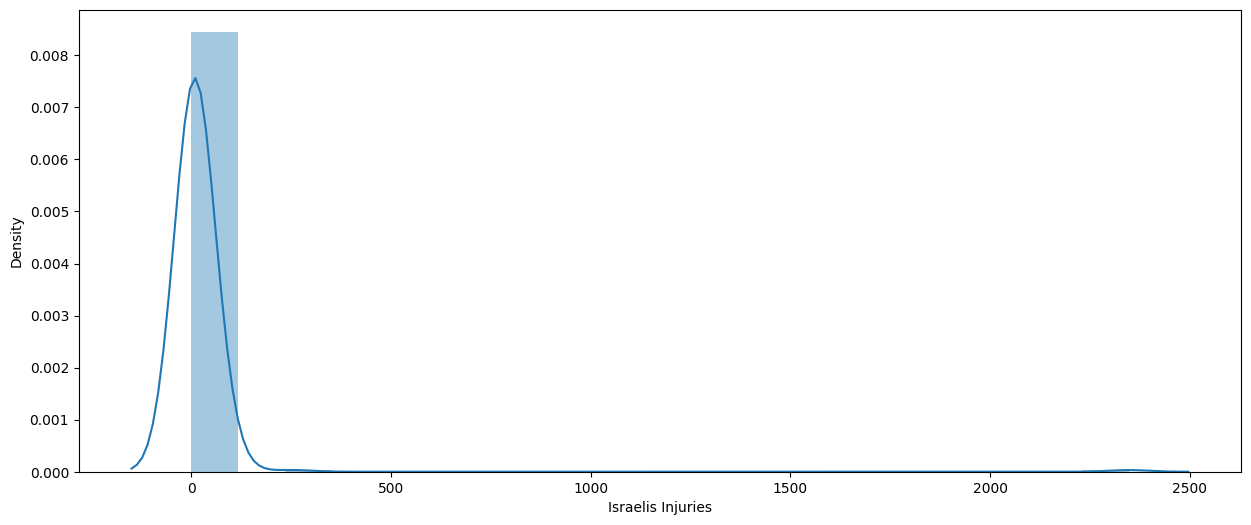

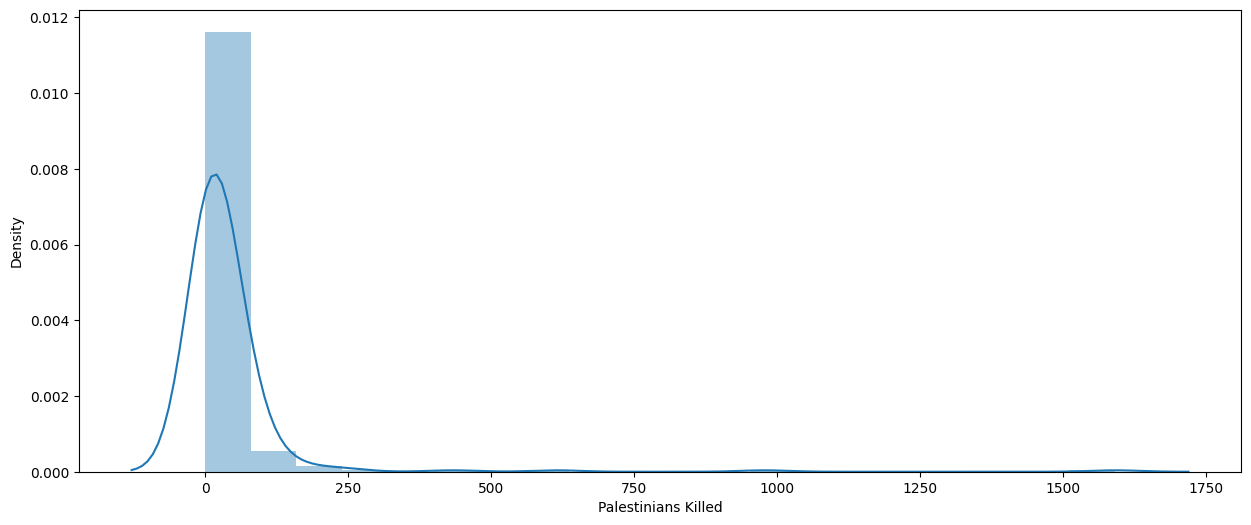

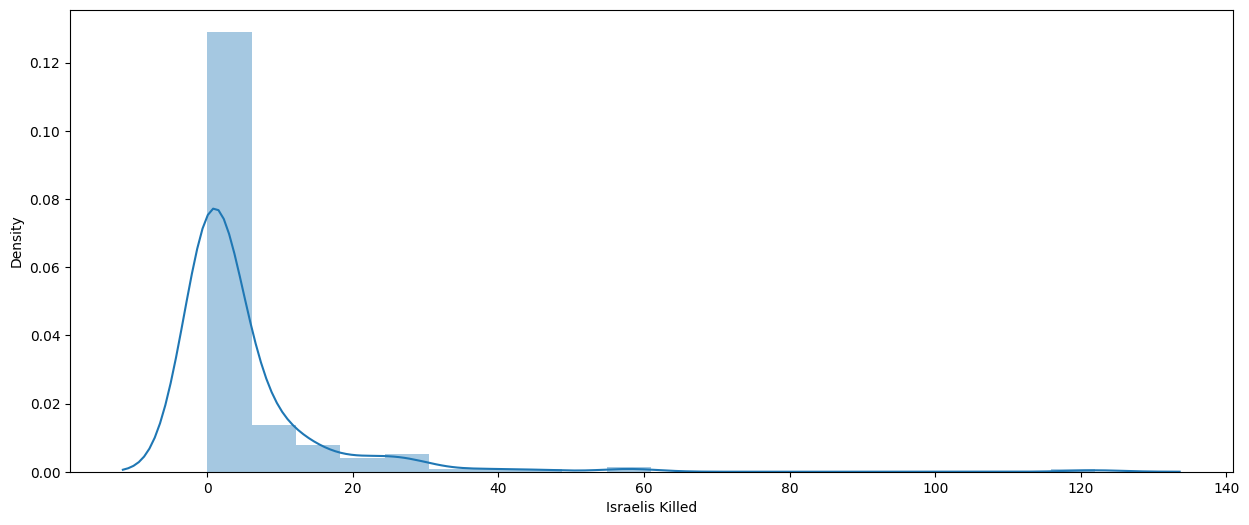

In [19]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df1[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

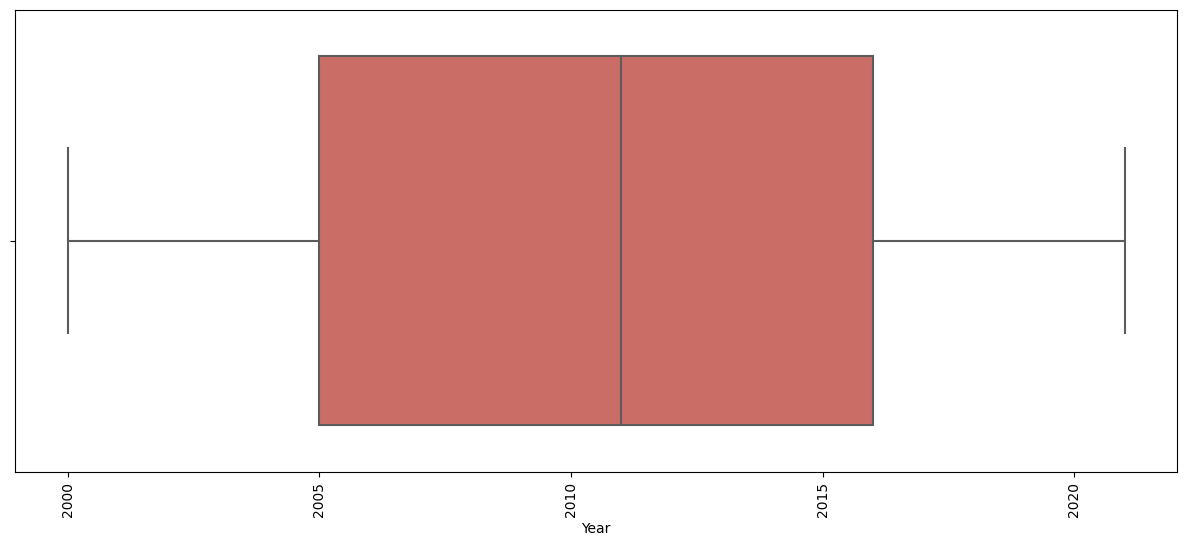

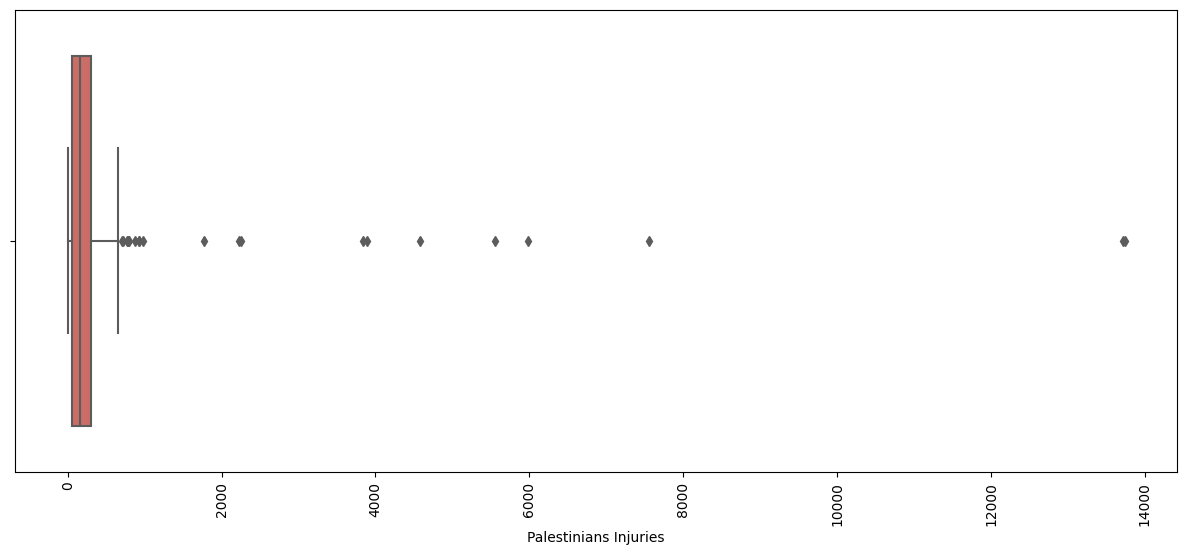

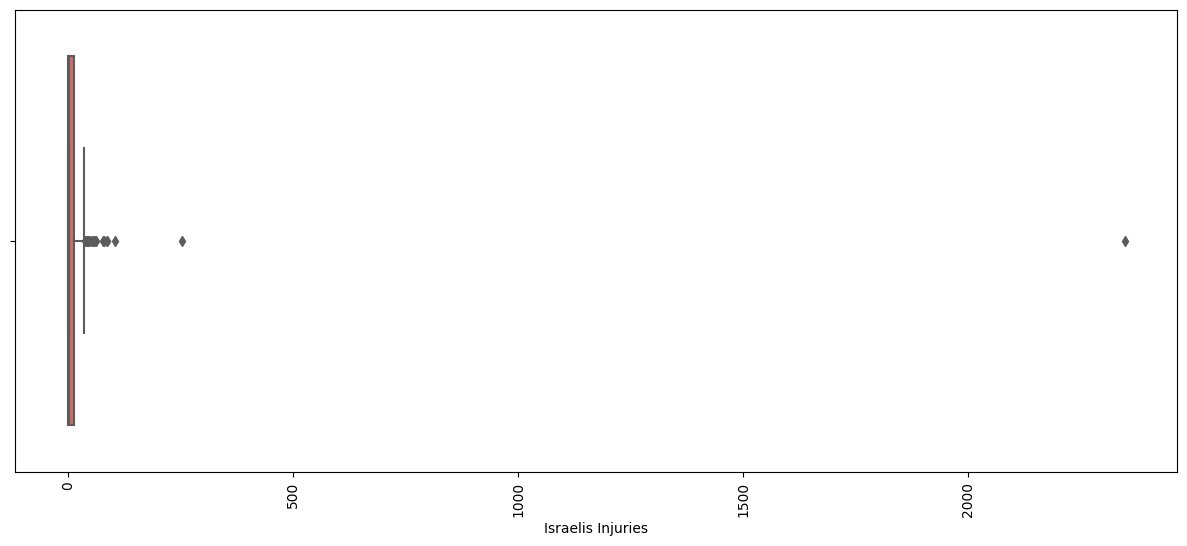

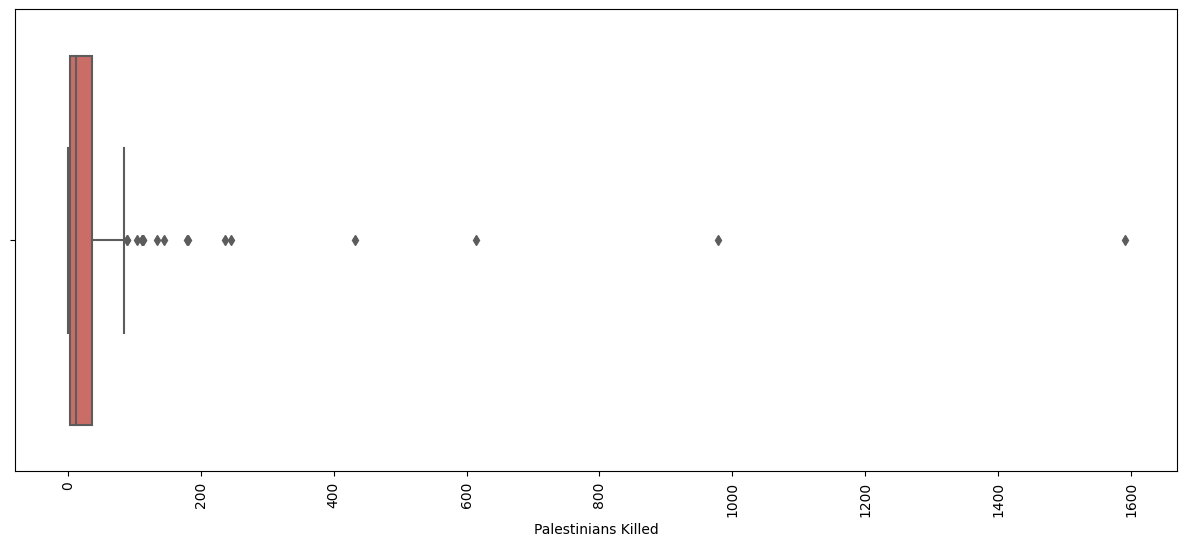

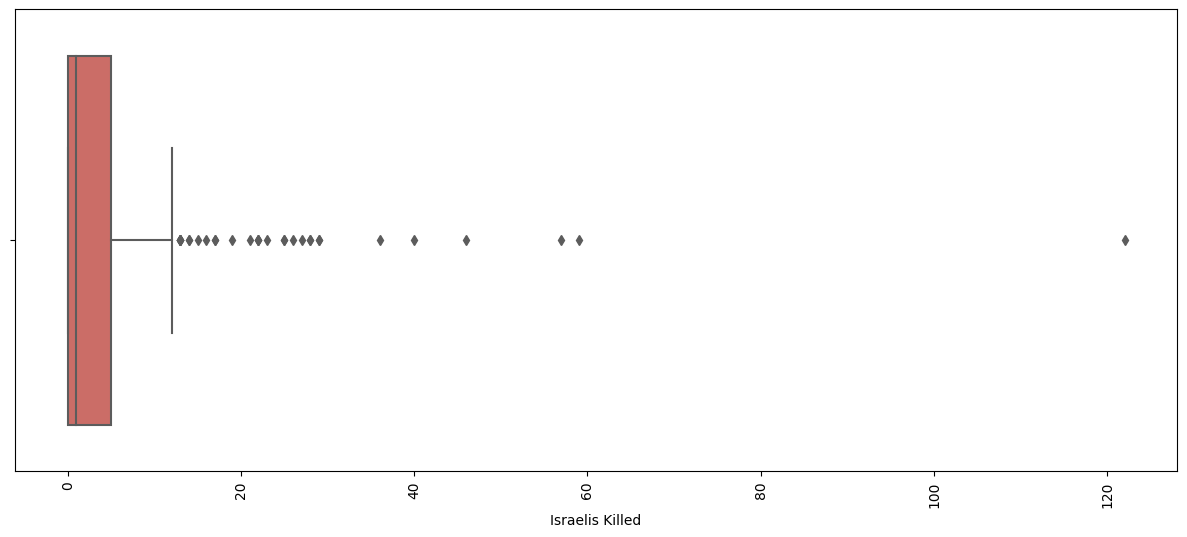

In [20]:
# Create boxplots for selected columns
for i in df1.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df1, palette='hls')
    plt.xticks(rotation=90)
    plt.show()


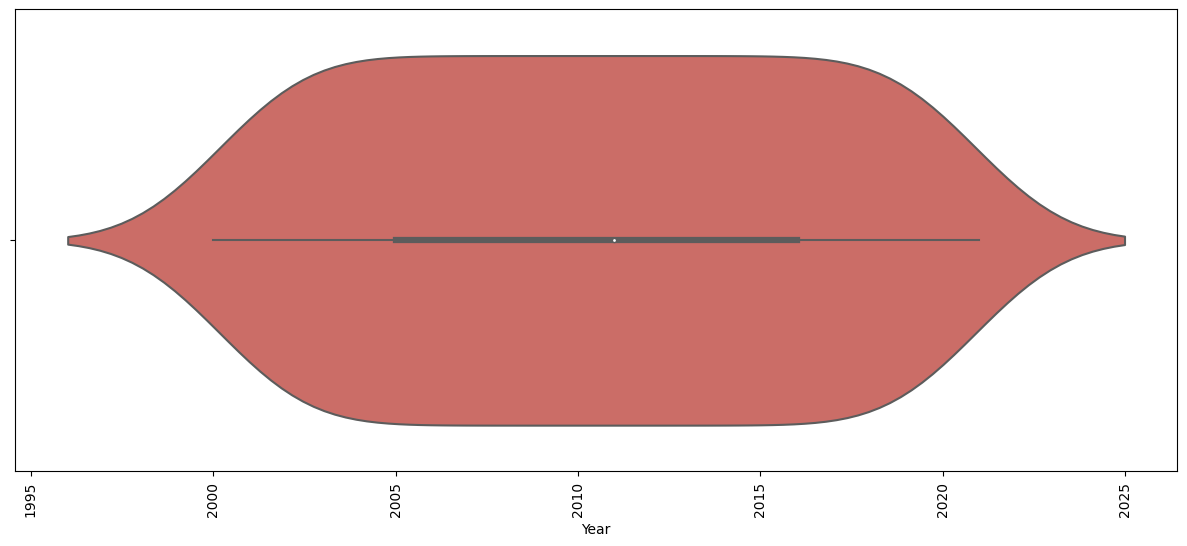

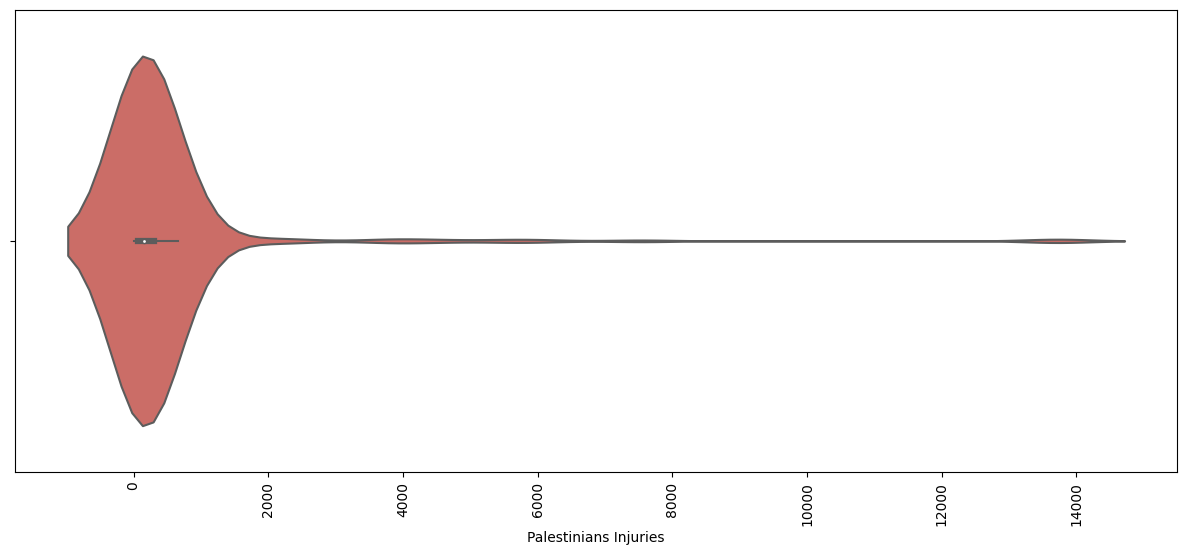

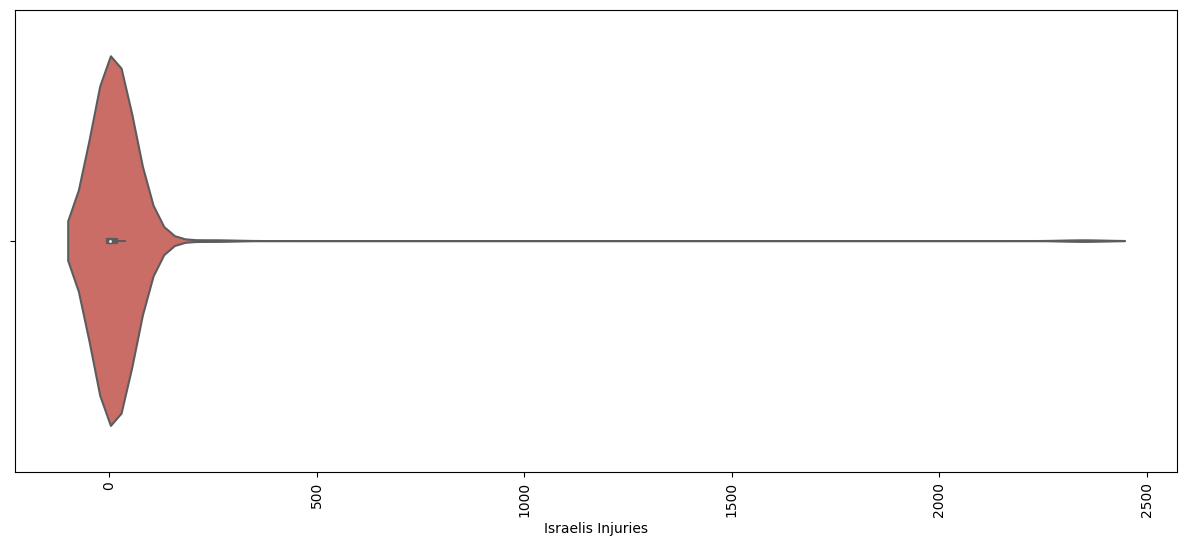

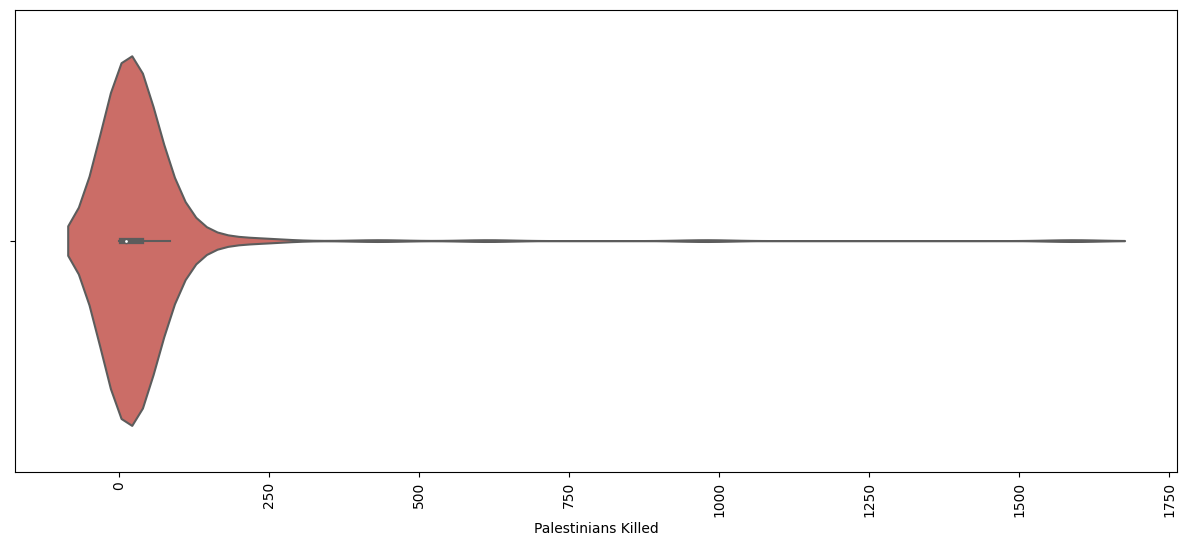

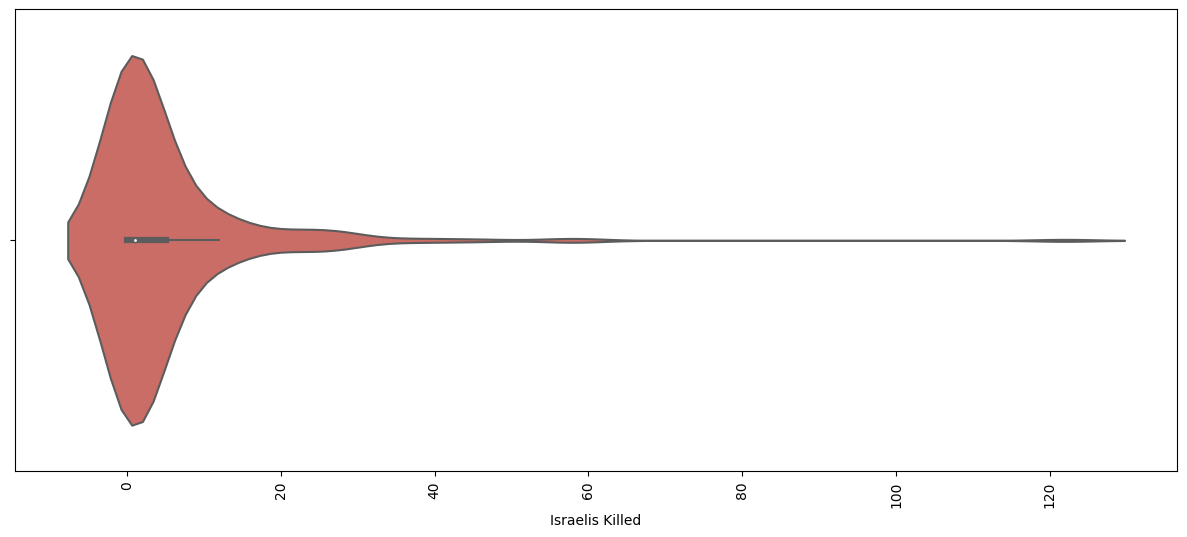

In [21]:
for i in df1.columns:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df1, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [22]:
for i in df.columns:
    fig = go.Figure(data=[go.Histogram(x=df[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

In [23]:
for i in df1.columns:
    fig = go.Figure(data=[go.Box(x=df1[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

In [24]:
for i in df1.columns:
    fig = go.Figure(data=[go.Violin(x=df1[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

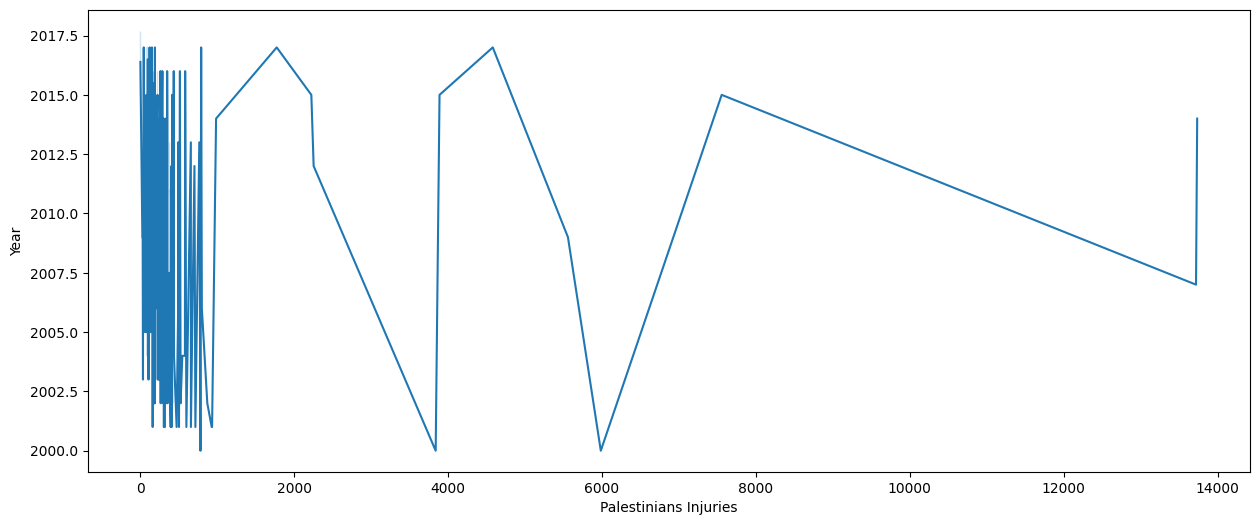

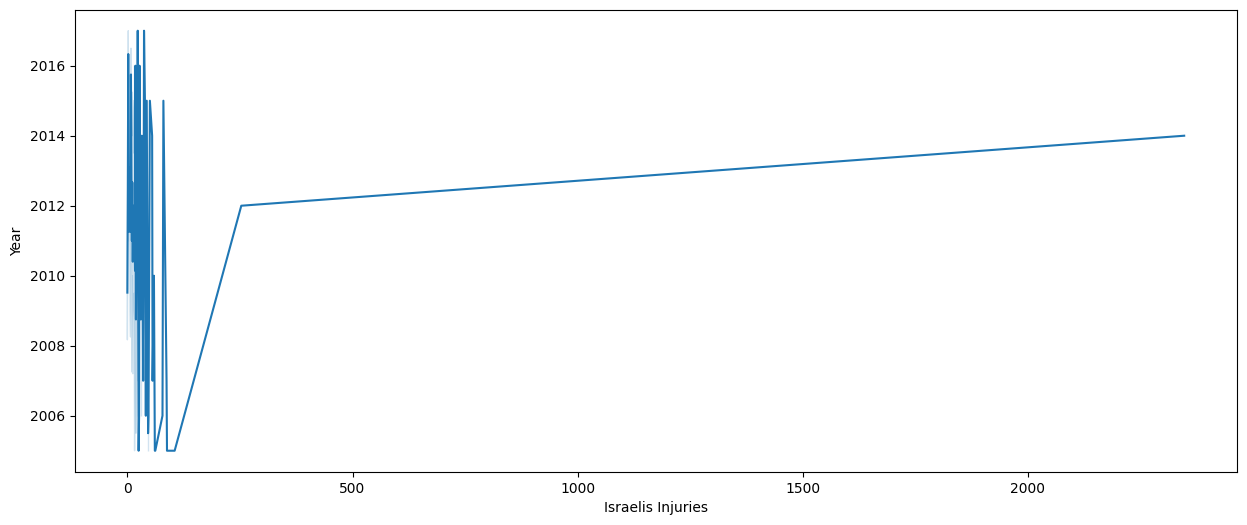

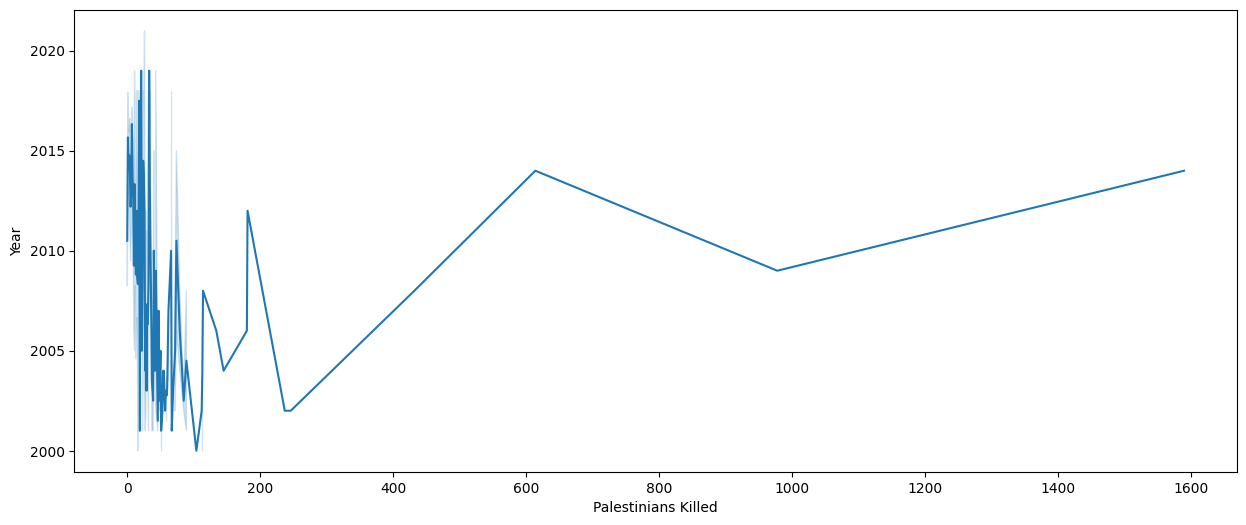

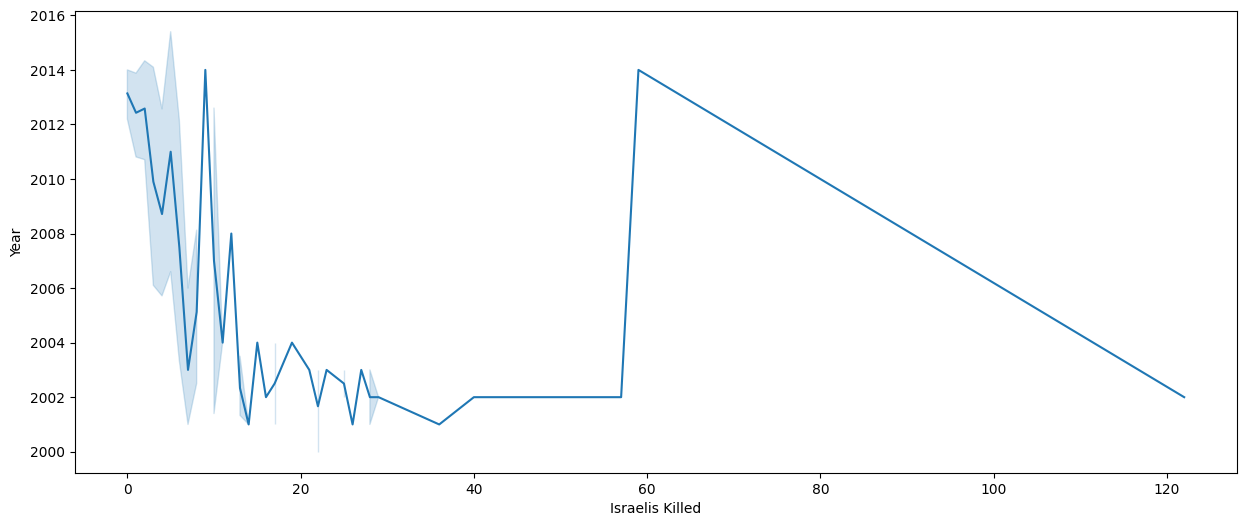

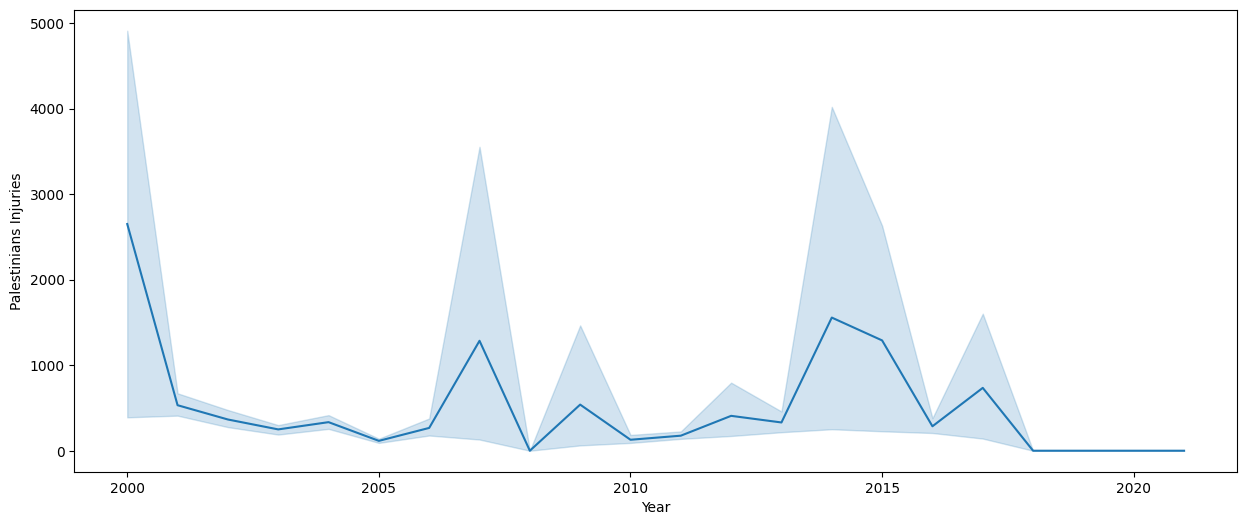

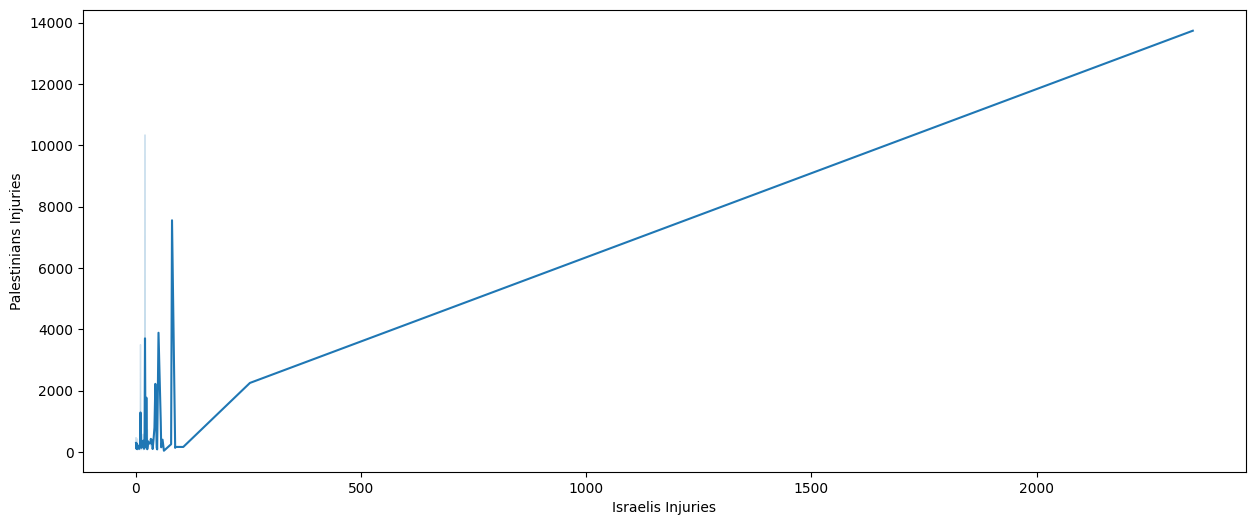

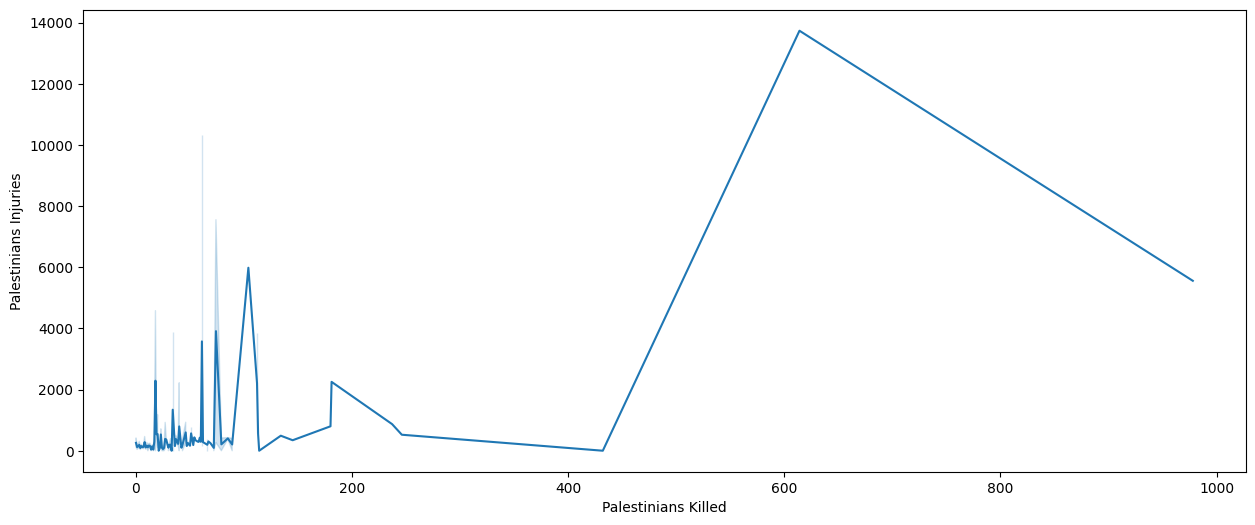

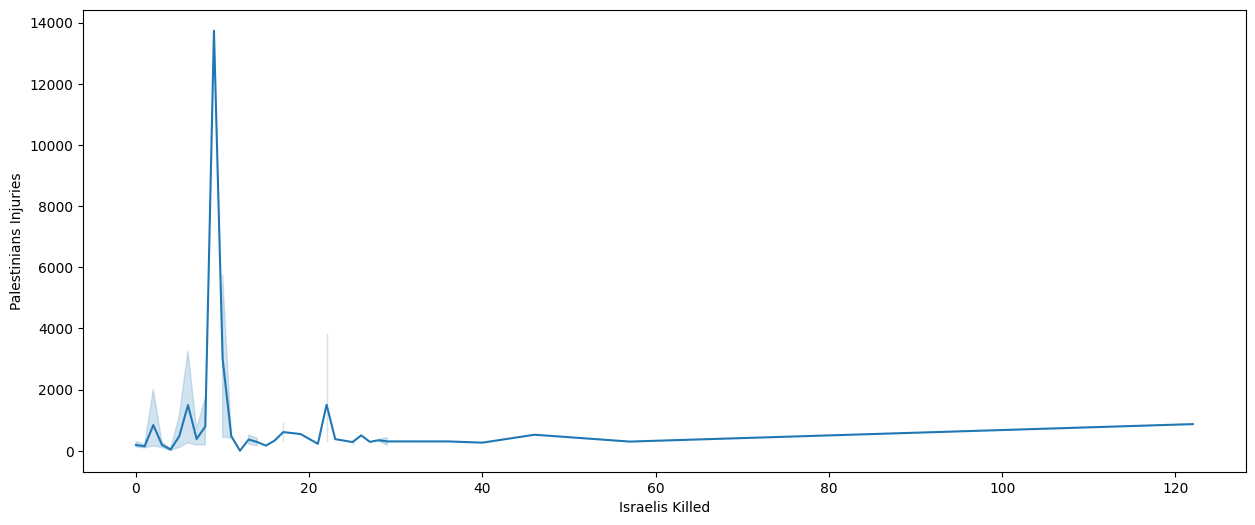

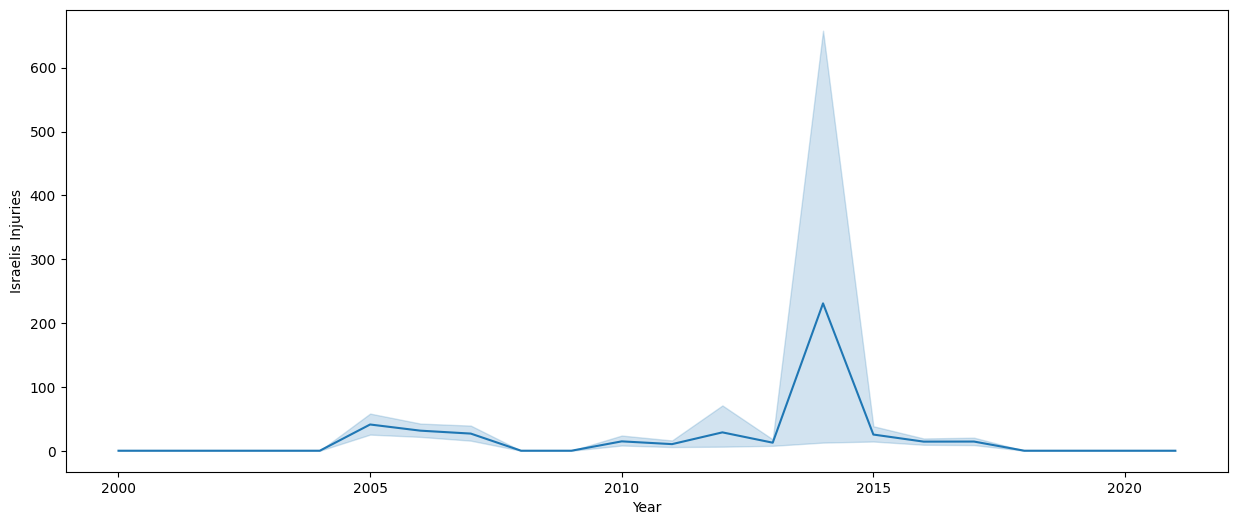

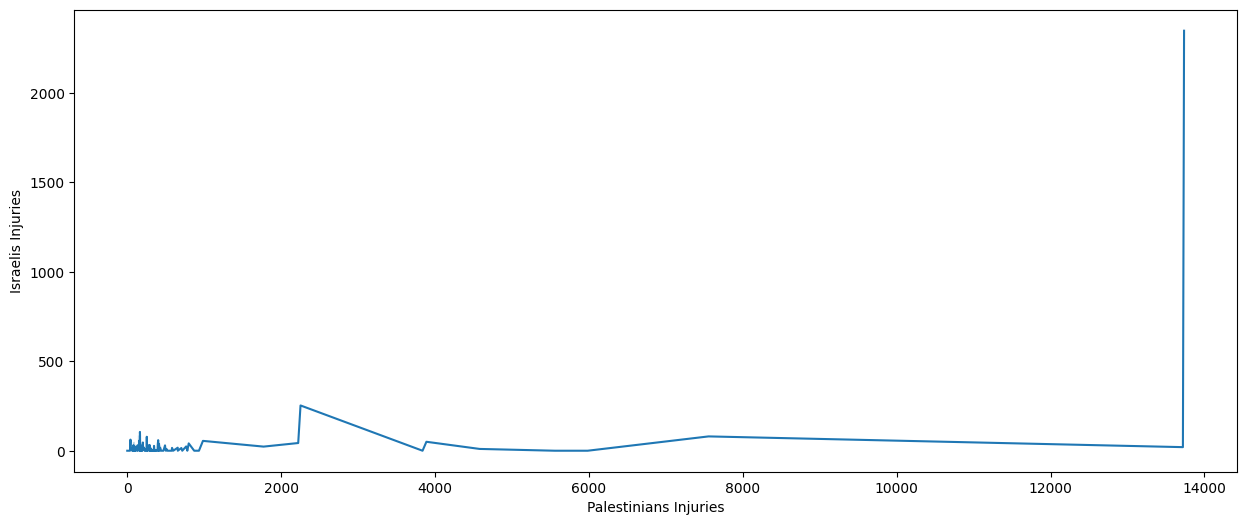

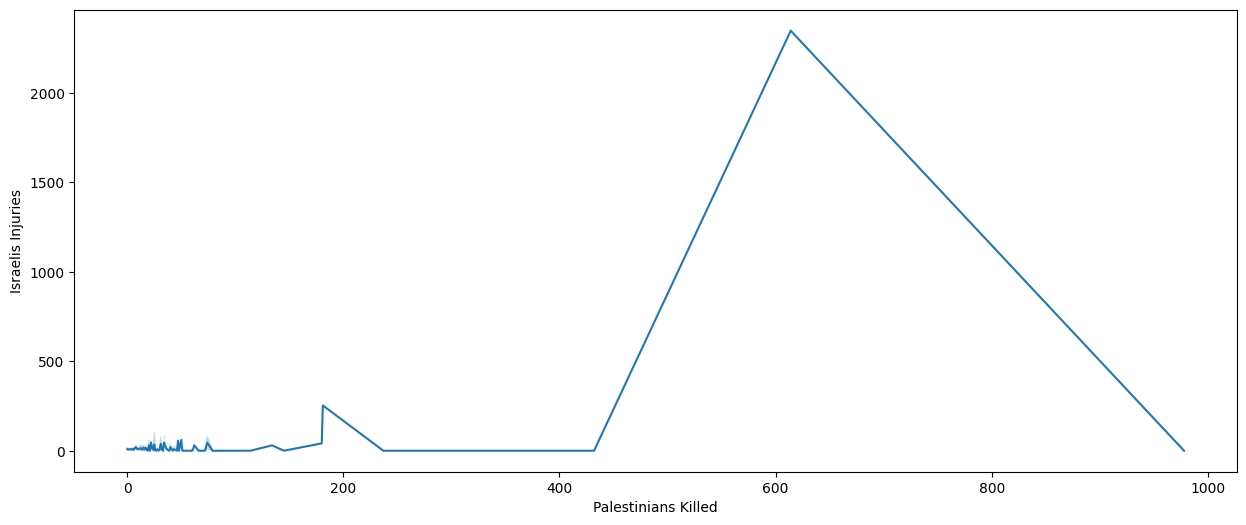

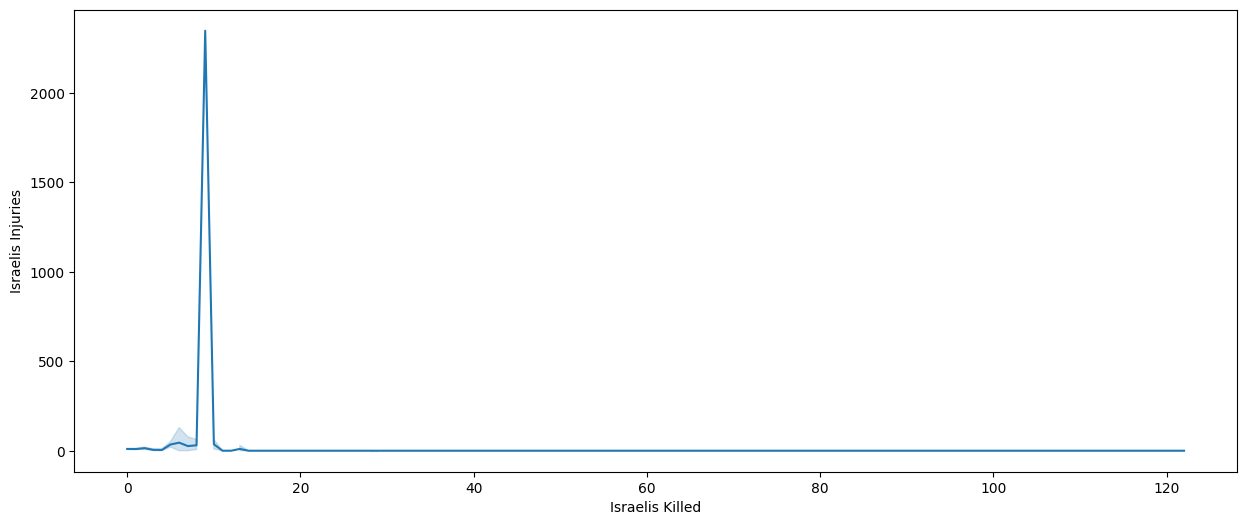

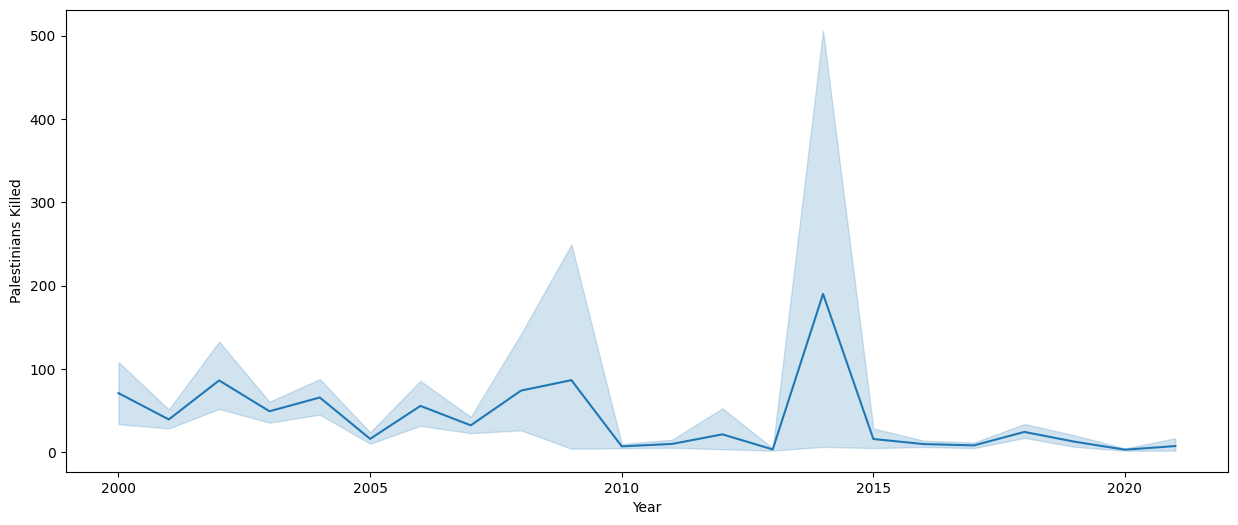

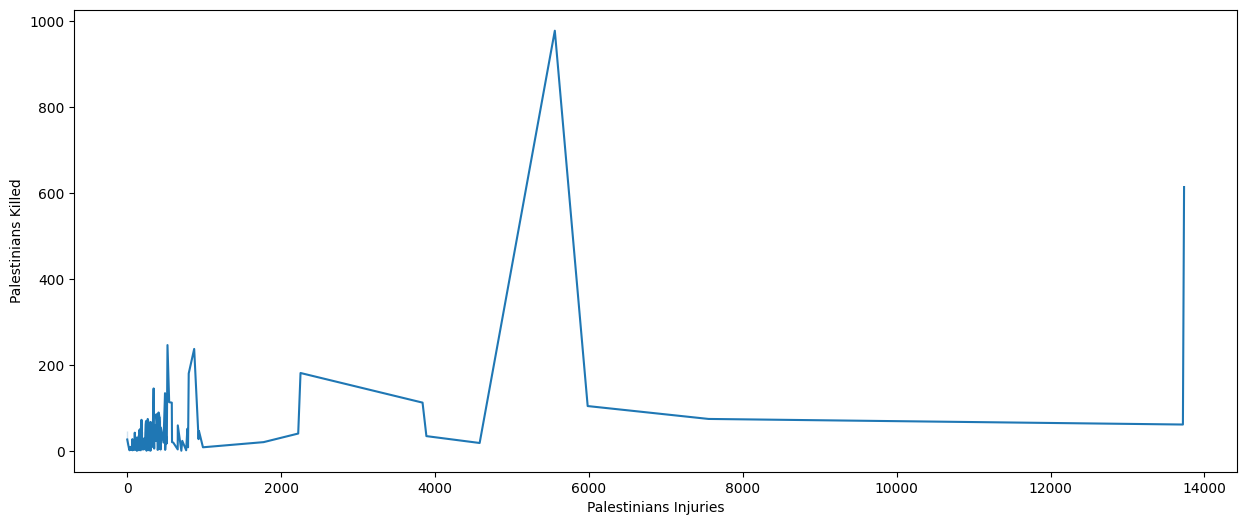

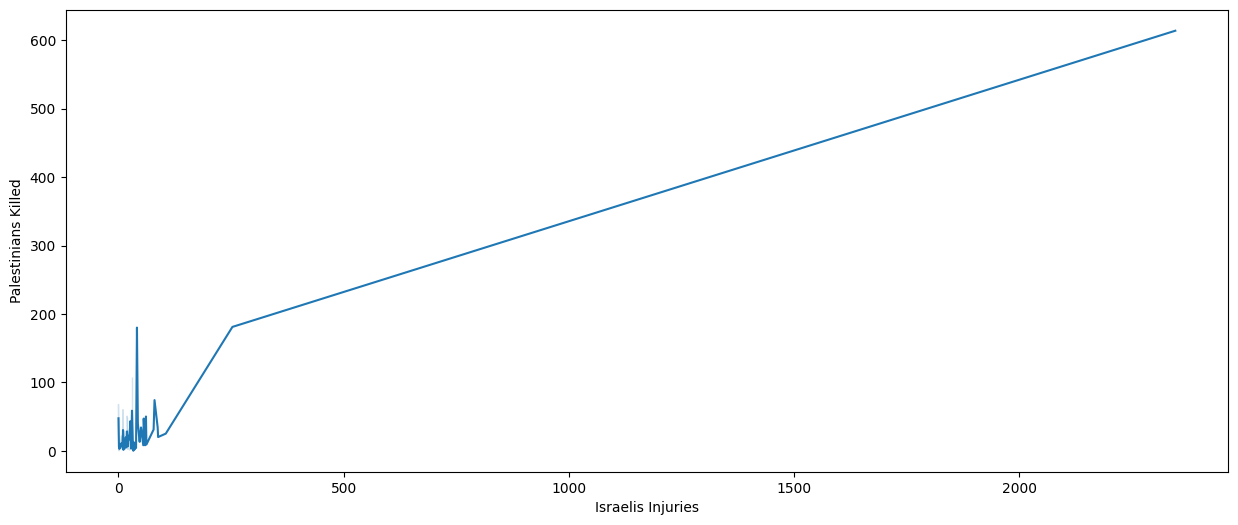

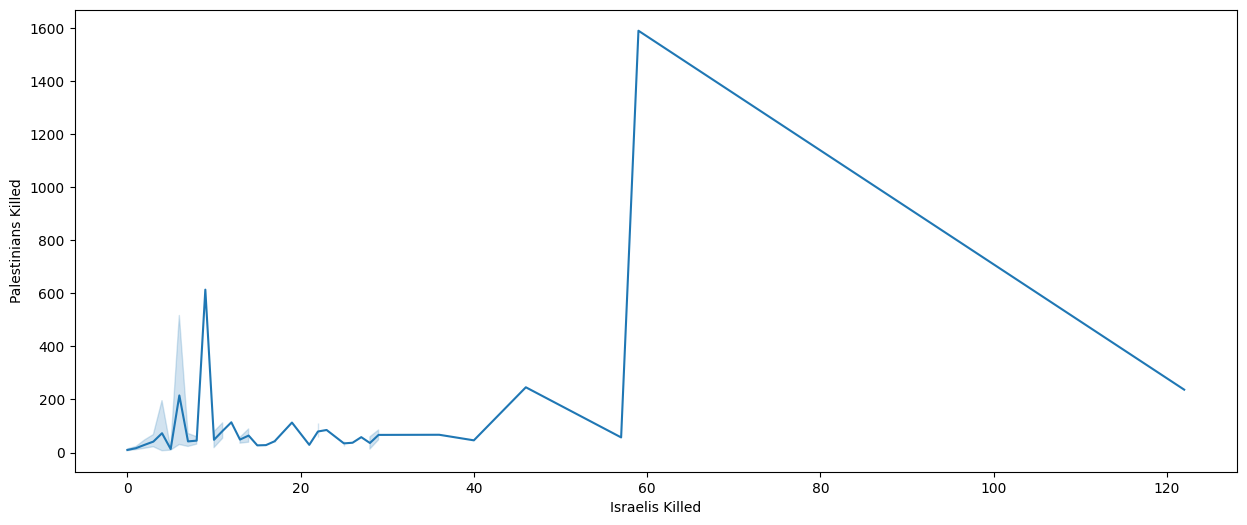

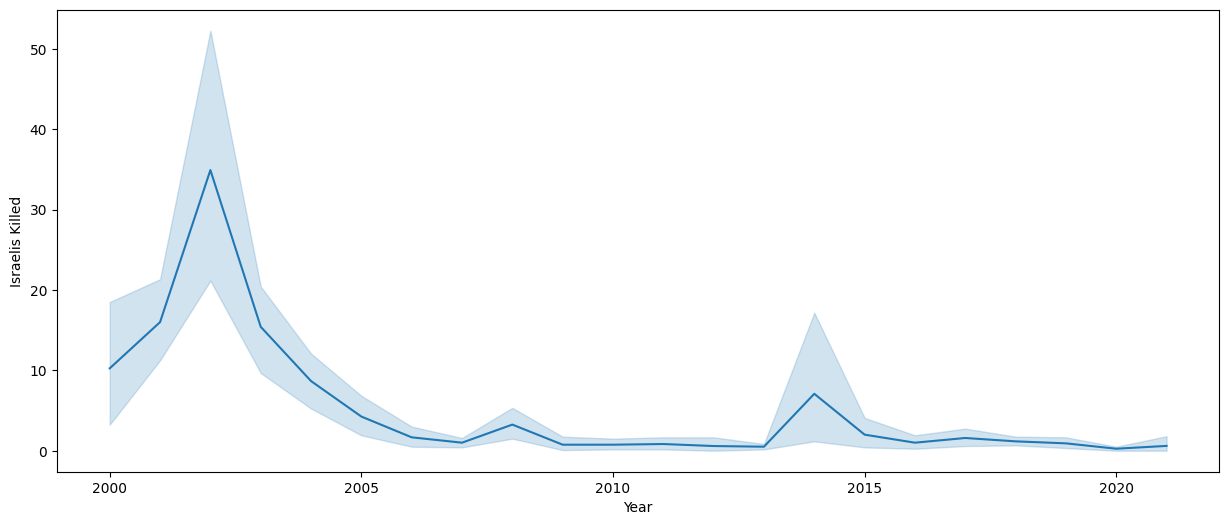

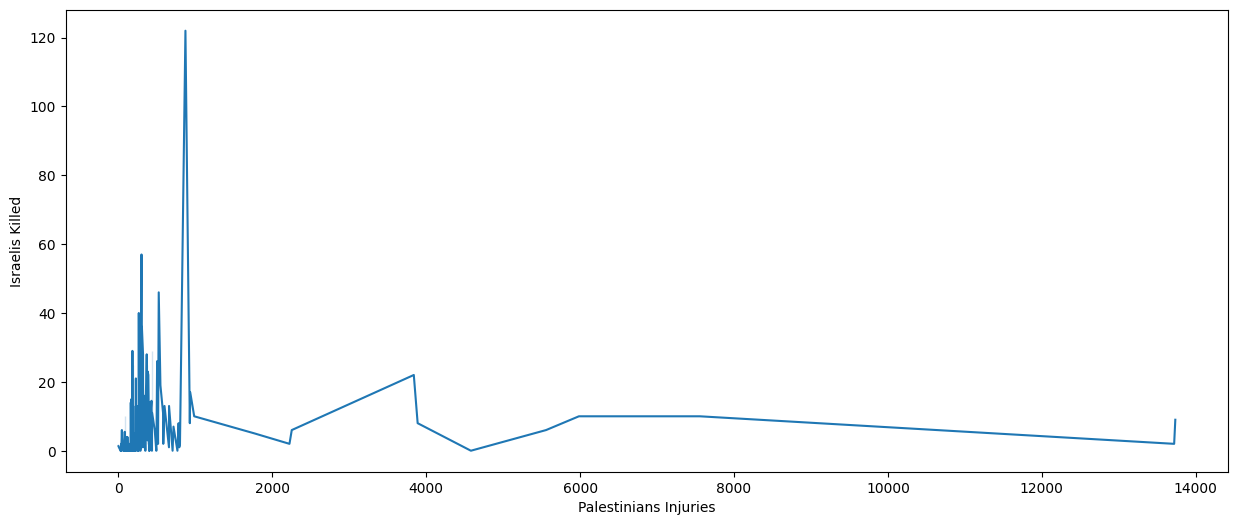

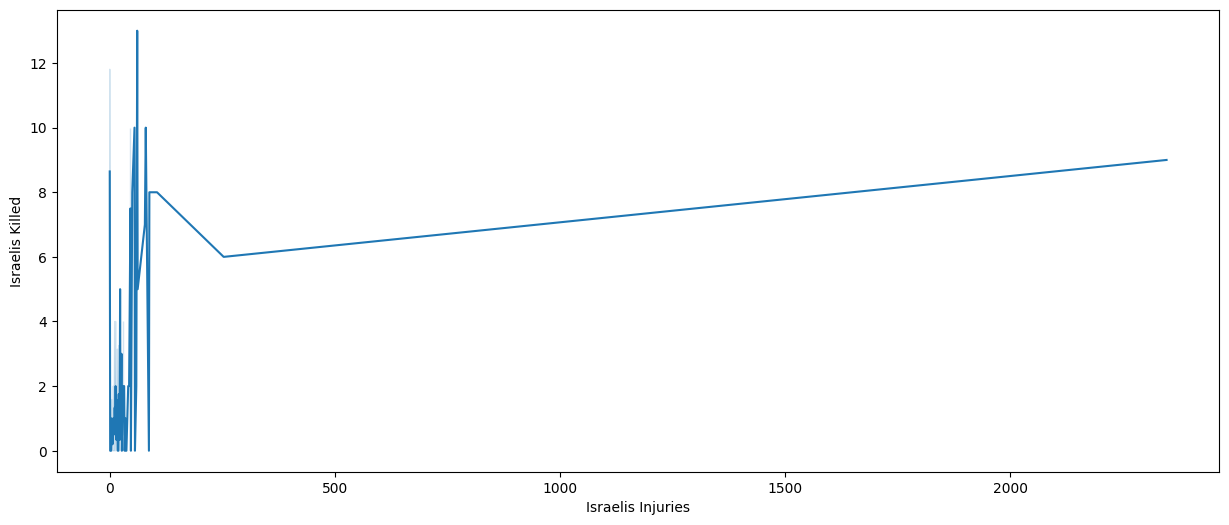

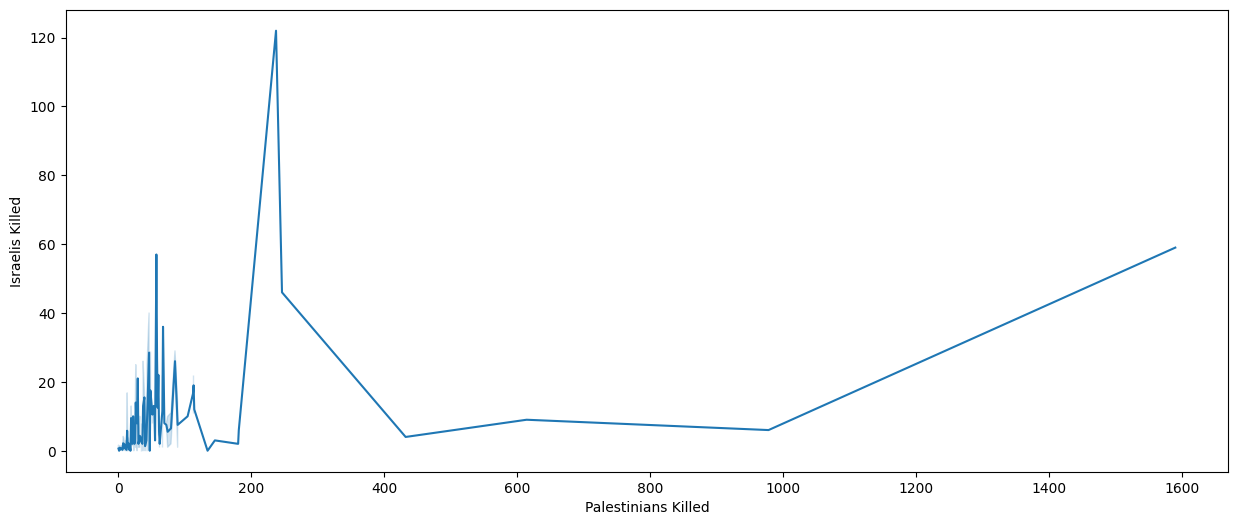

In [25]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.lineplot(x = df1[j], y = df1[i], data = df1, palette = 'hls')
            plt.show()

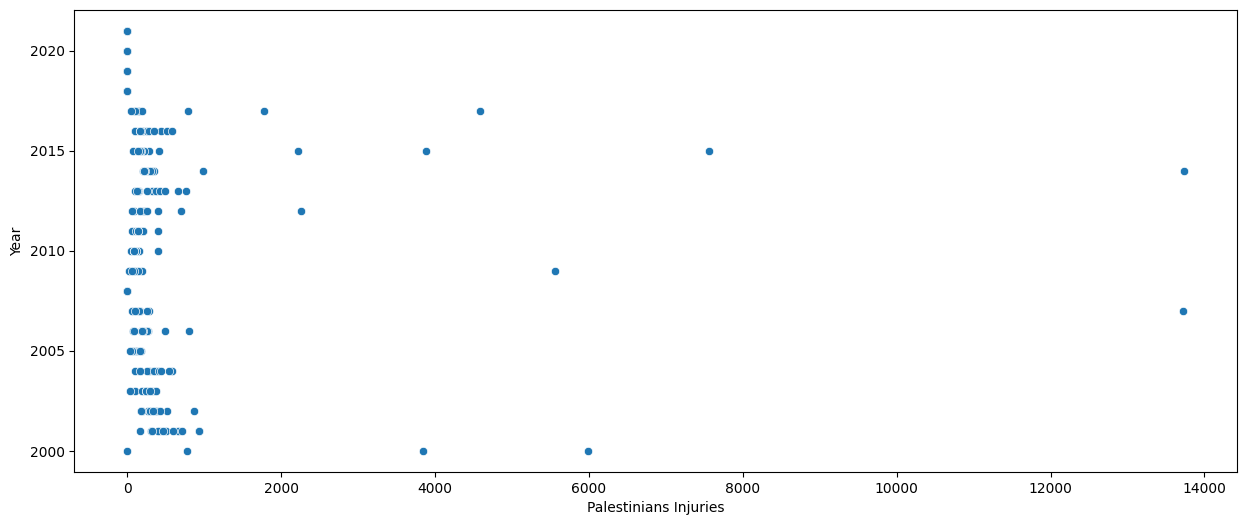

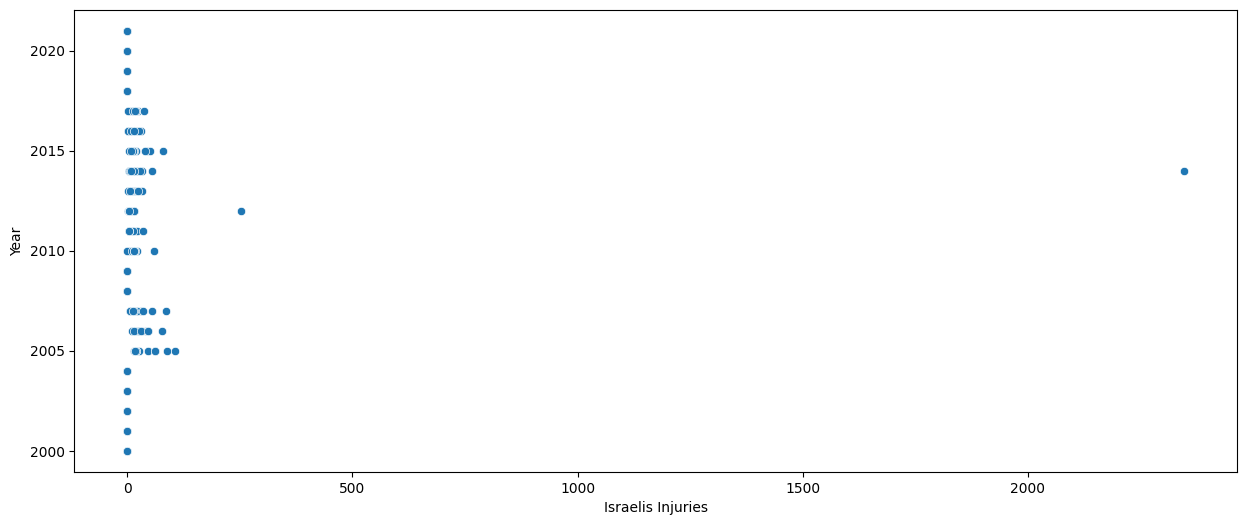

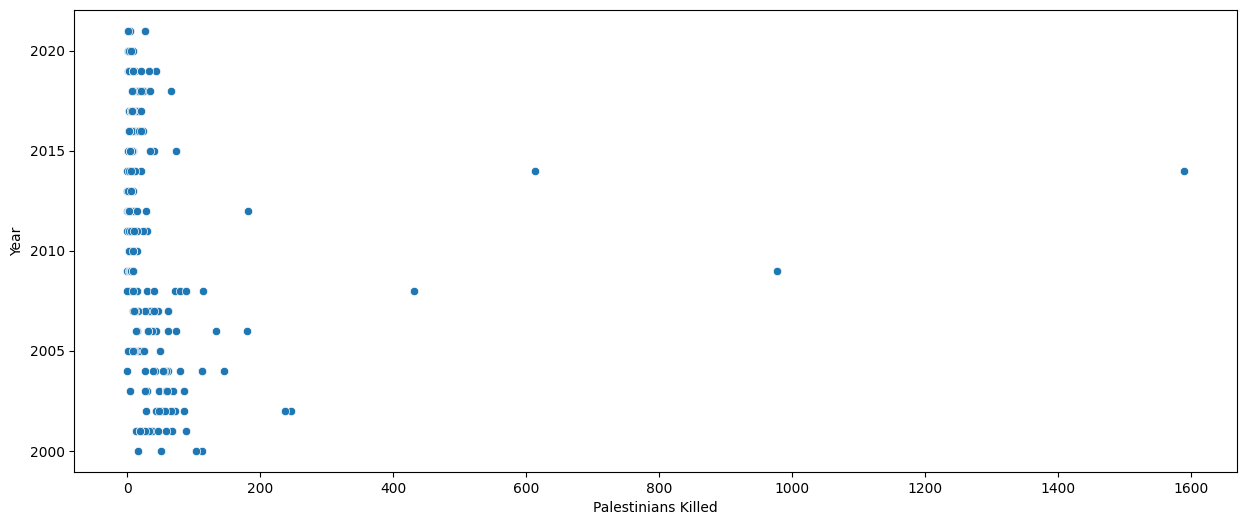

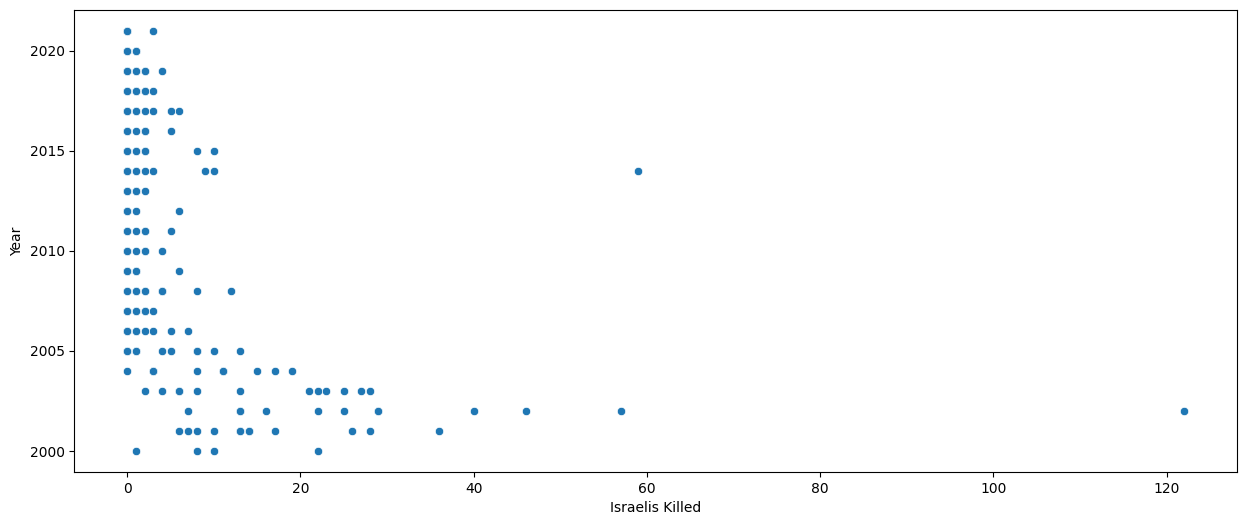

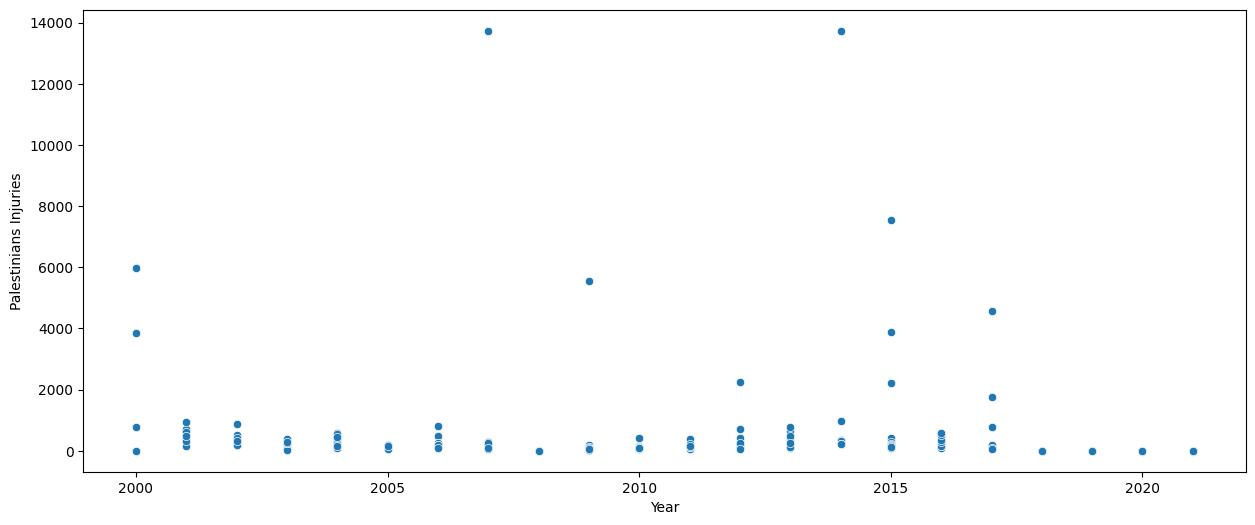

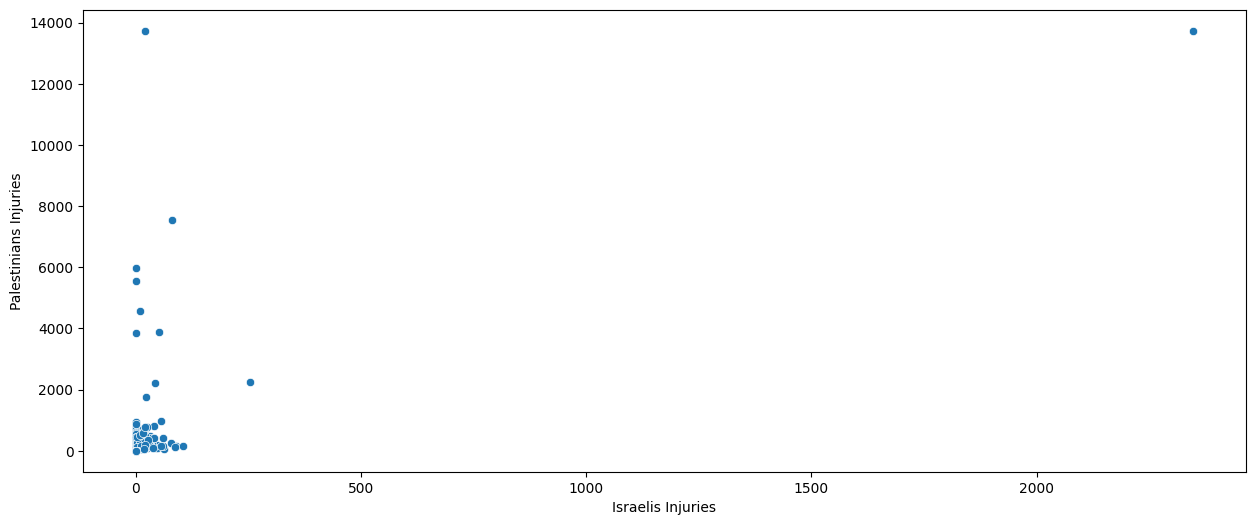

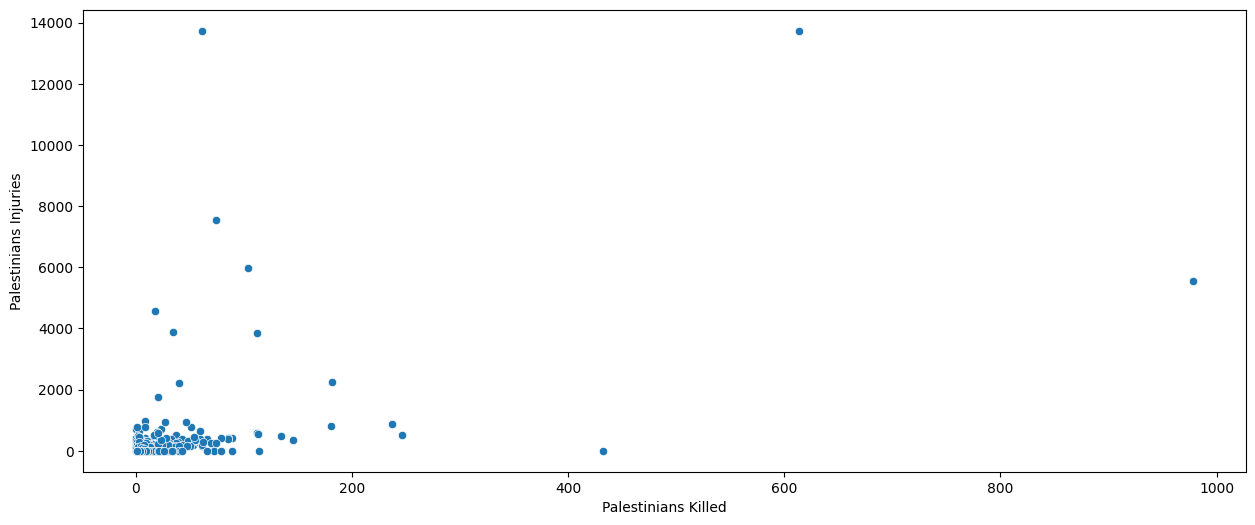

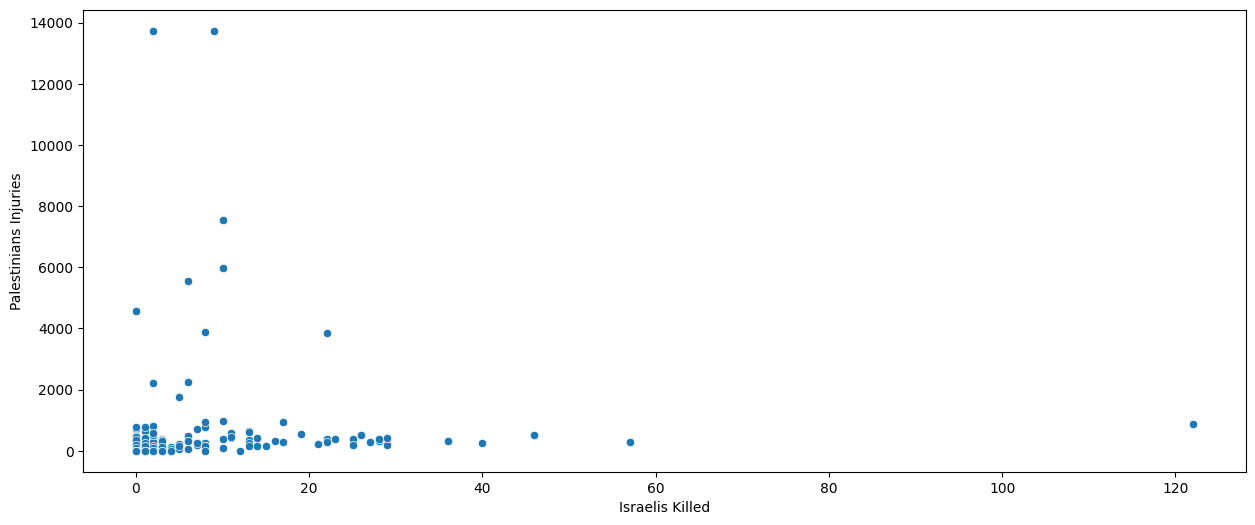

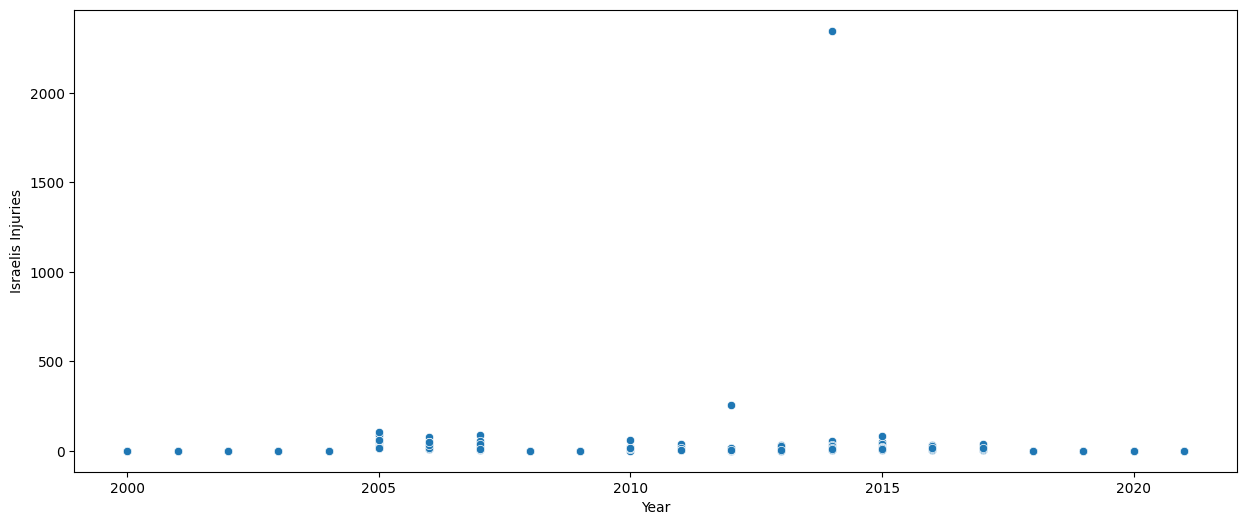

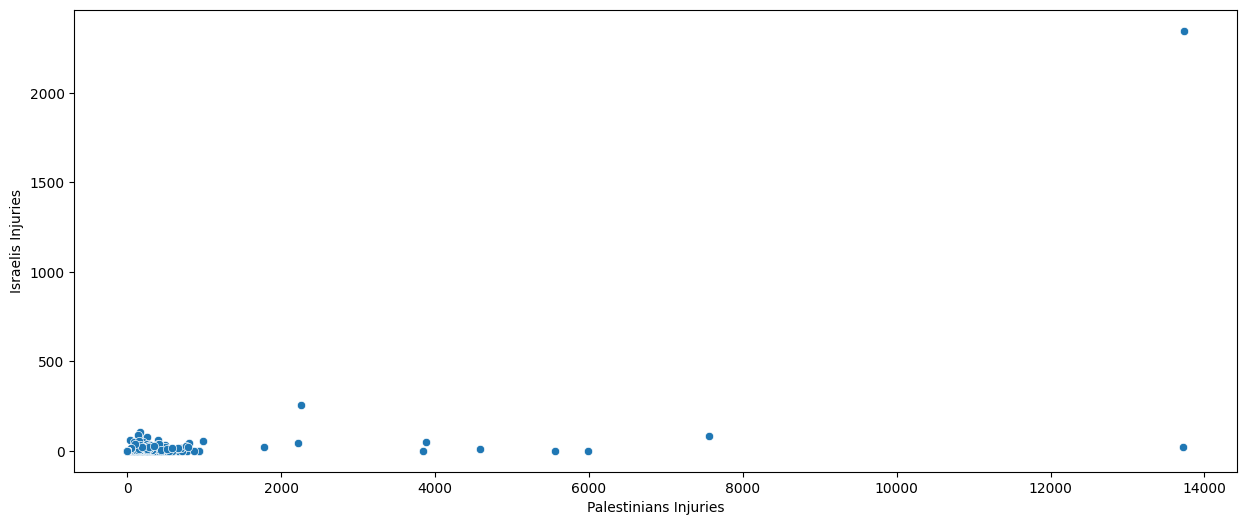

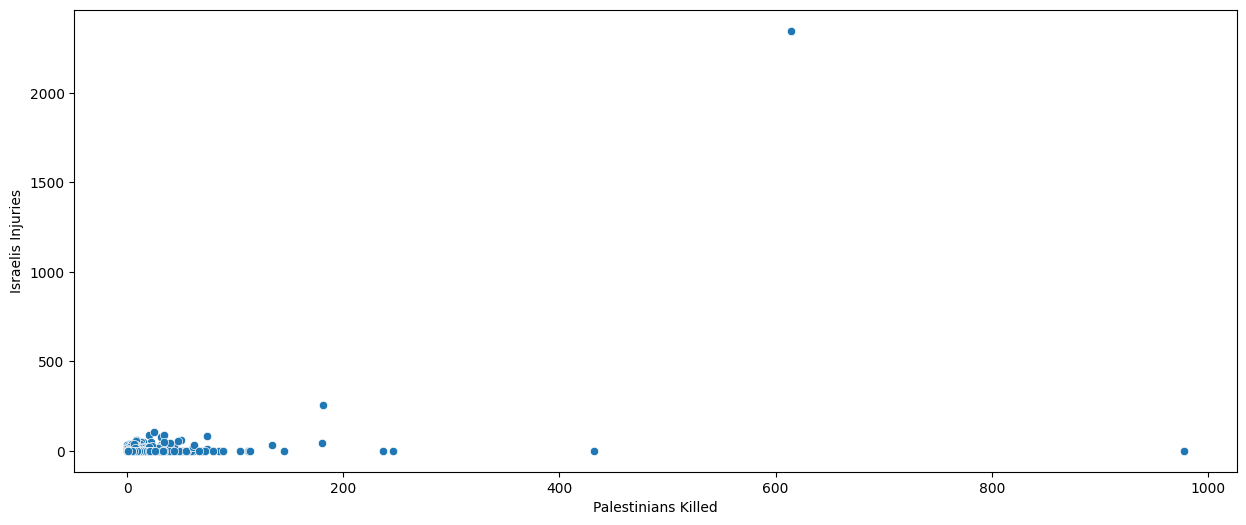

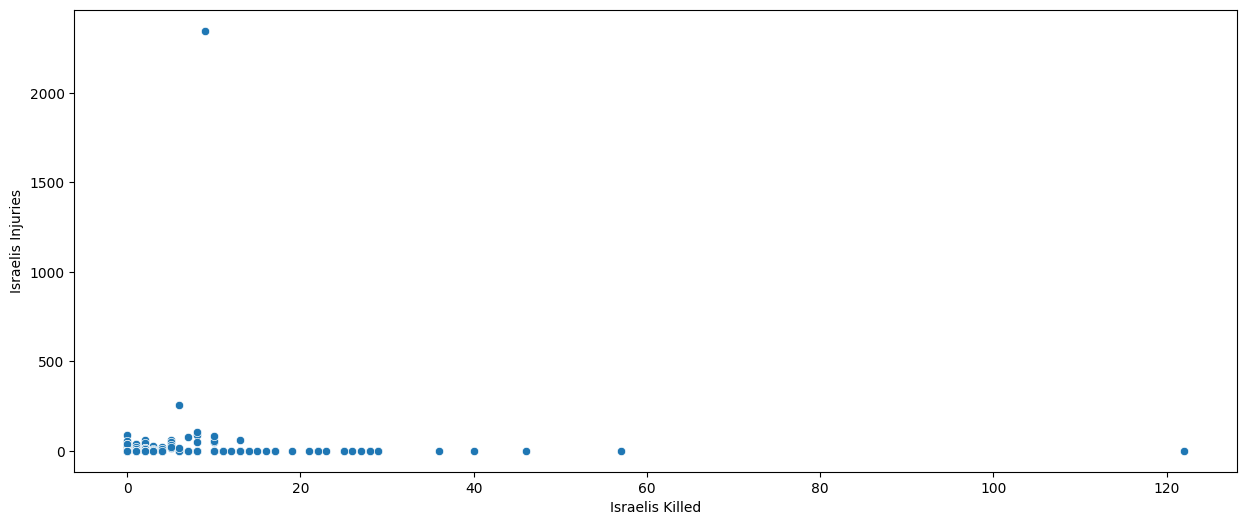

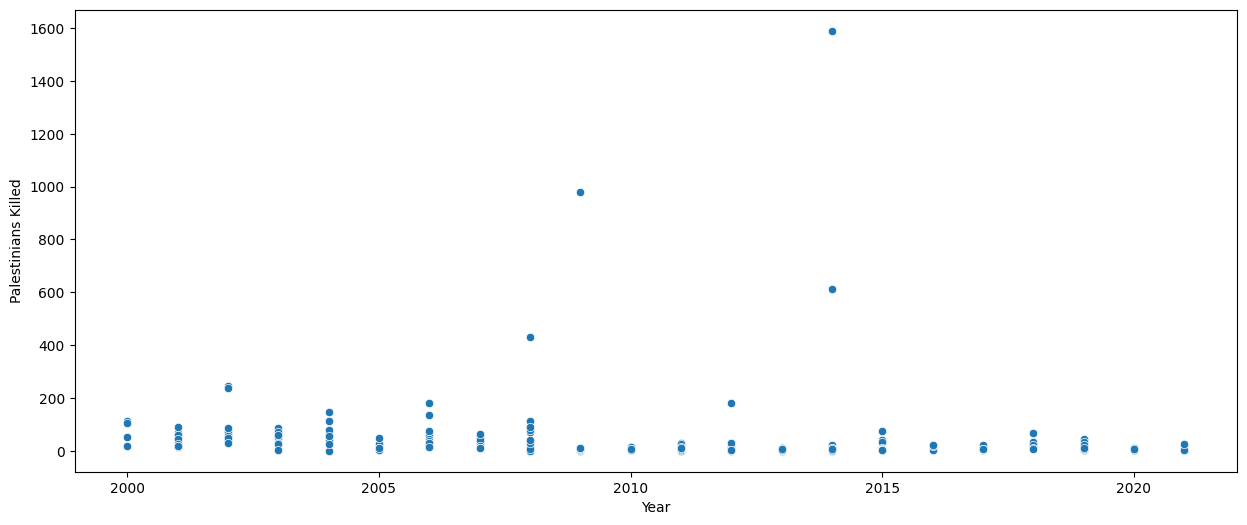

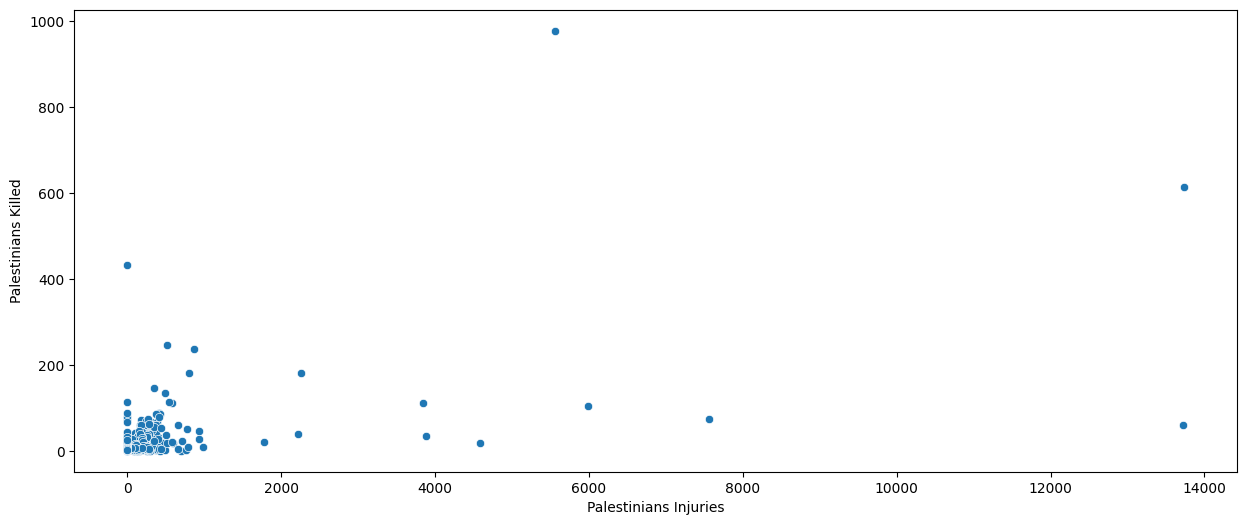

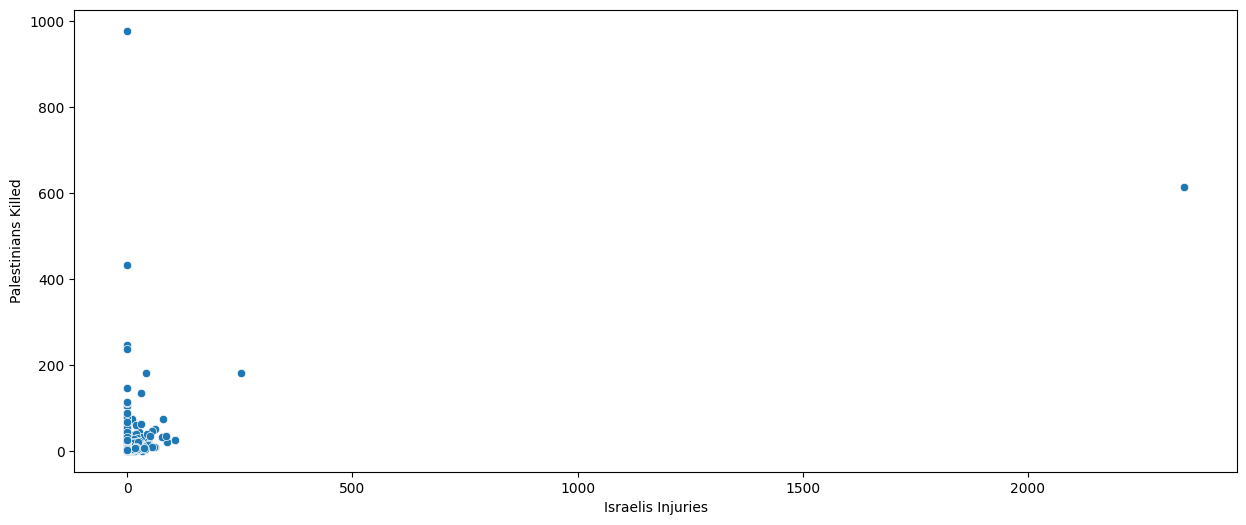

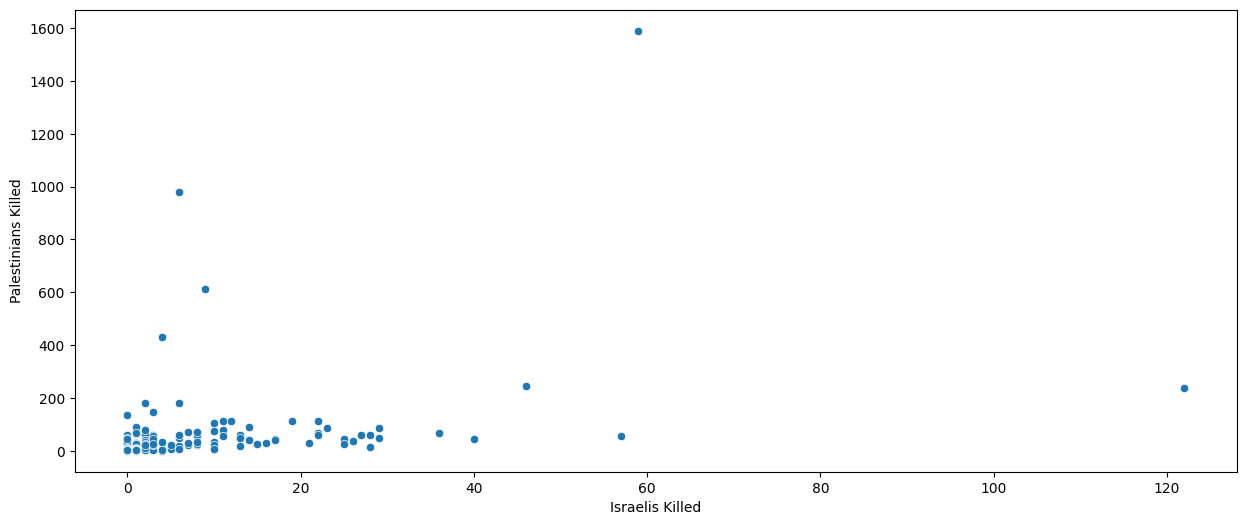

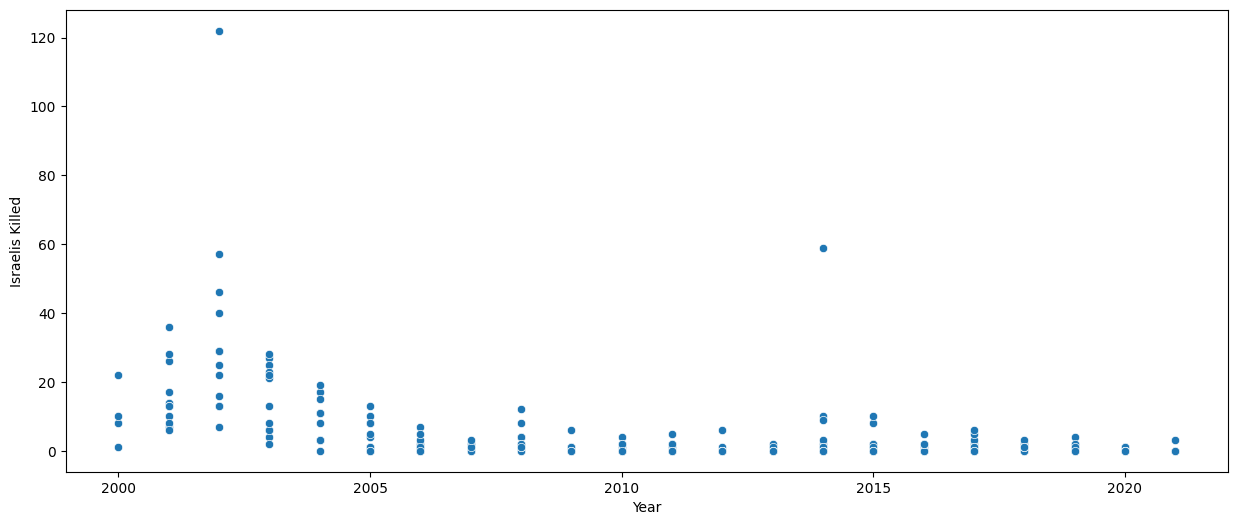

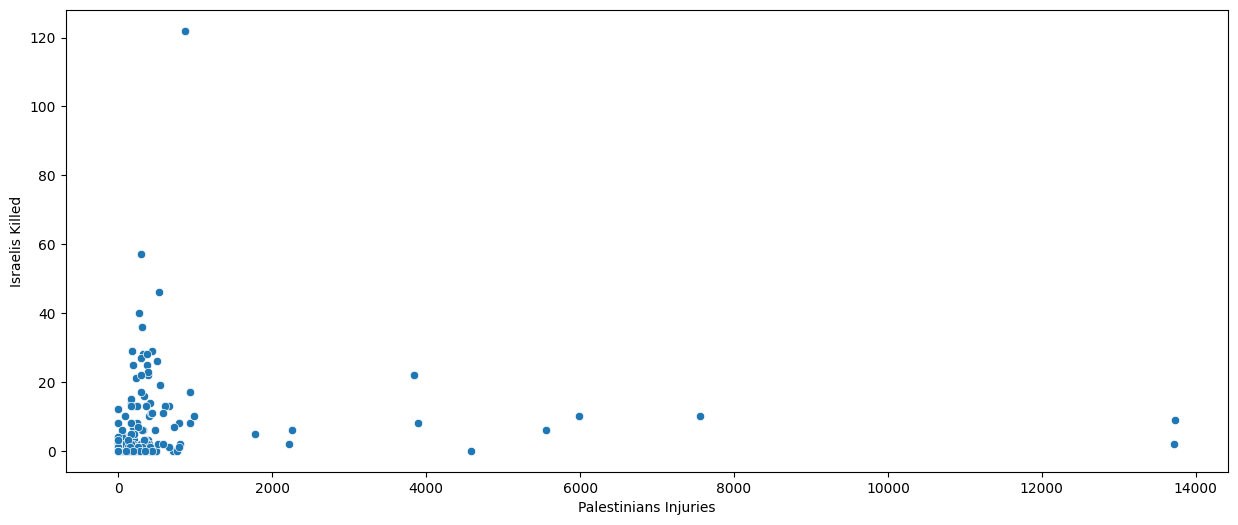

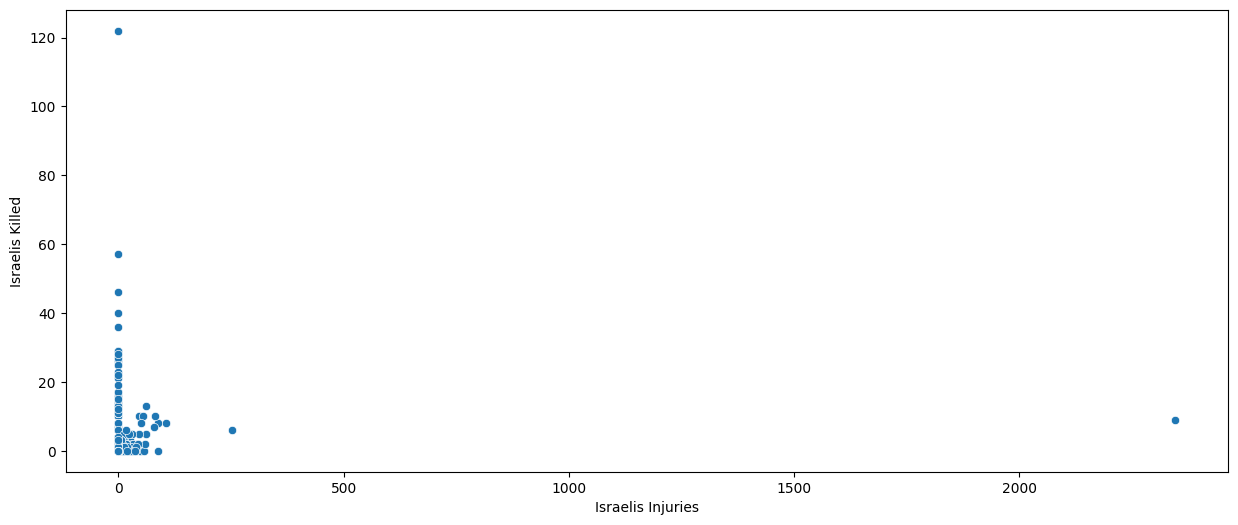

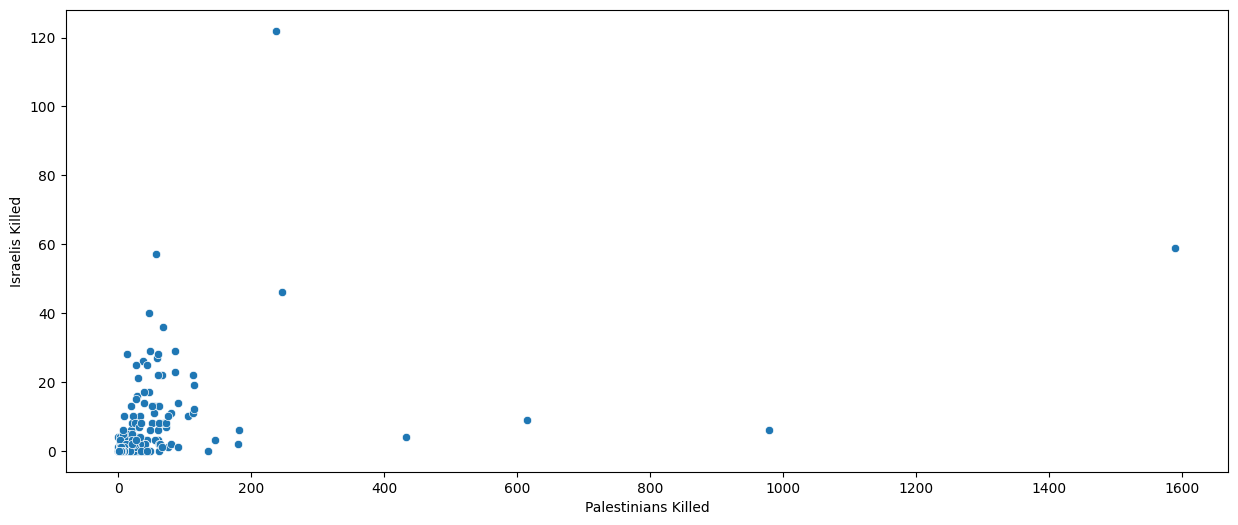

In [26]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df1[j], y = df1[i], data = df1, palette = 'hls')
            plt.show()

In [27]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            fig = px.line(df1, x=j, y=i, title=f'Line Plot: {i} vs {j}')
            fig.show()

In [28]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            fig = px.scatter(df1, x=j, y=i, title=f'Scatter Plot: {i} vs {j}')
            fig.show()

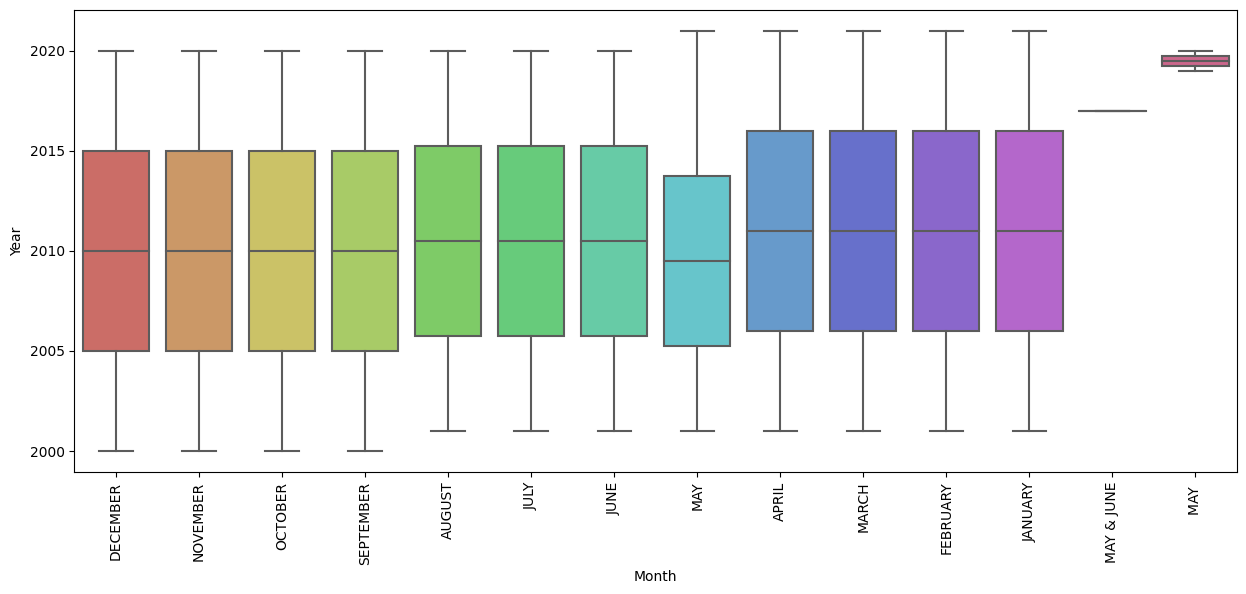

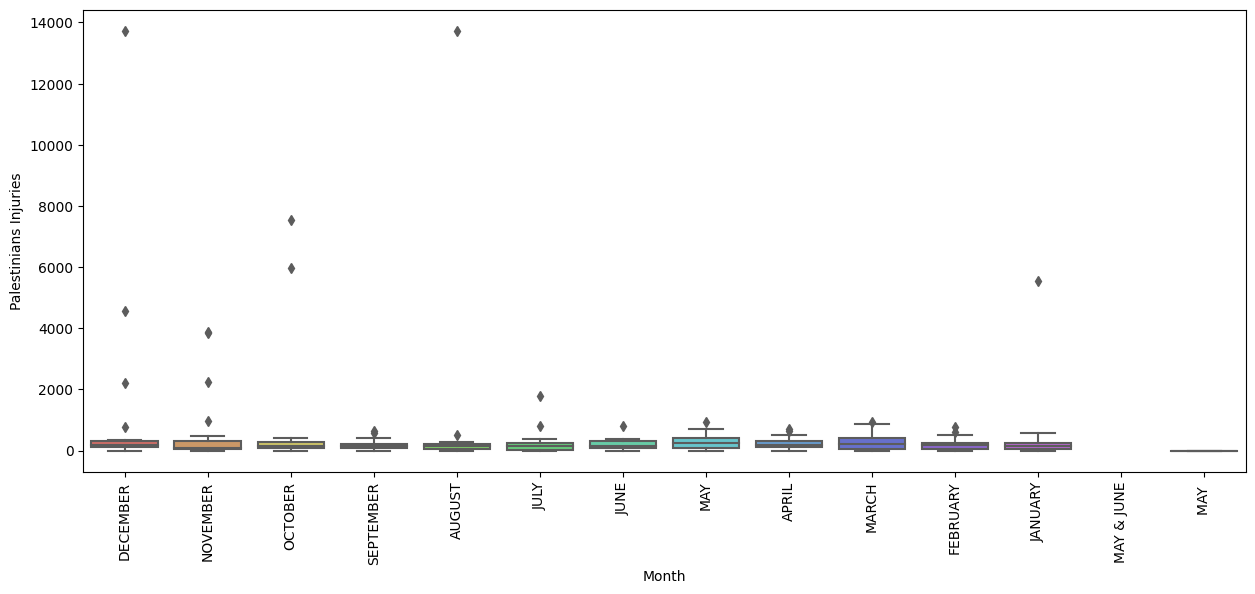

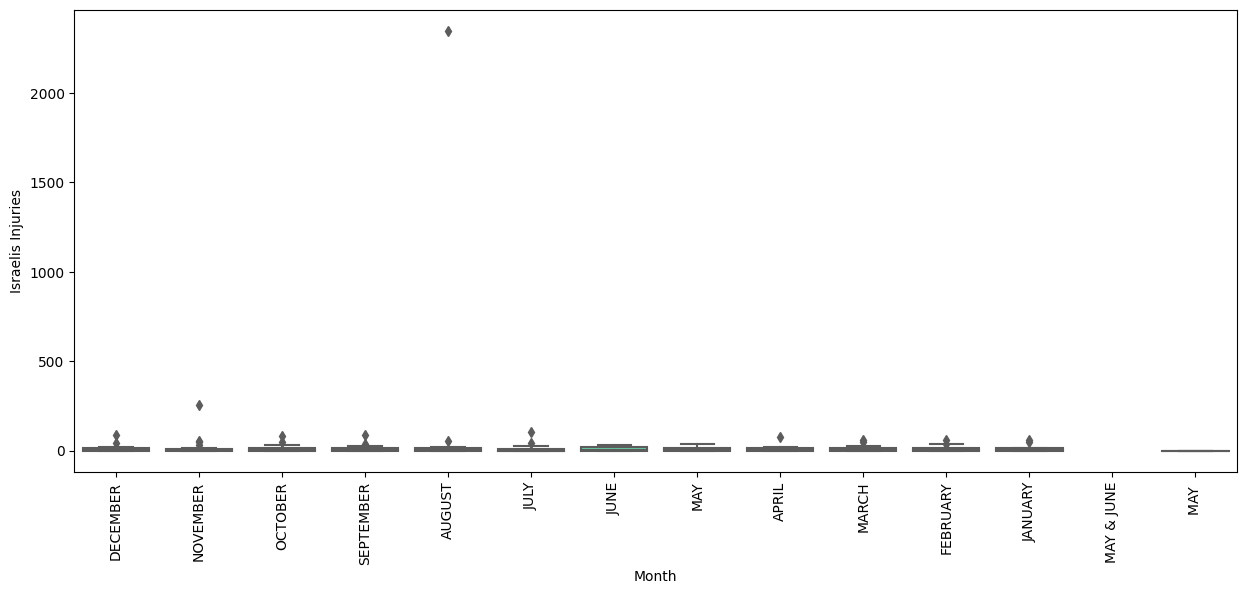

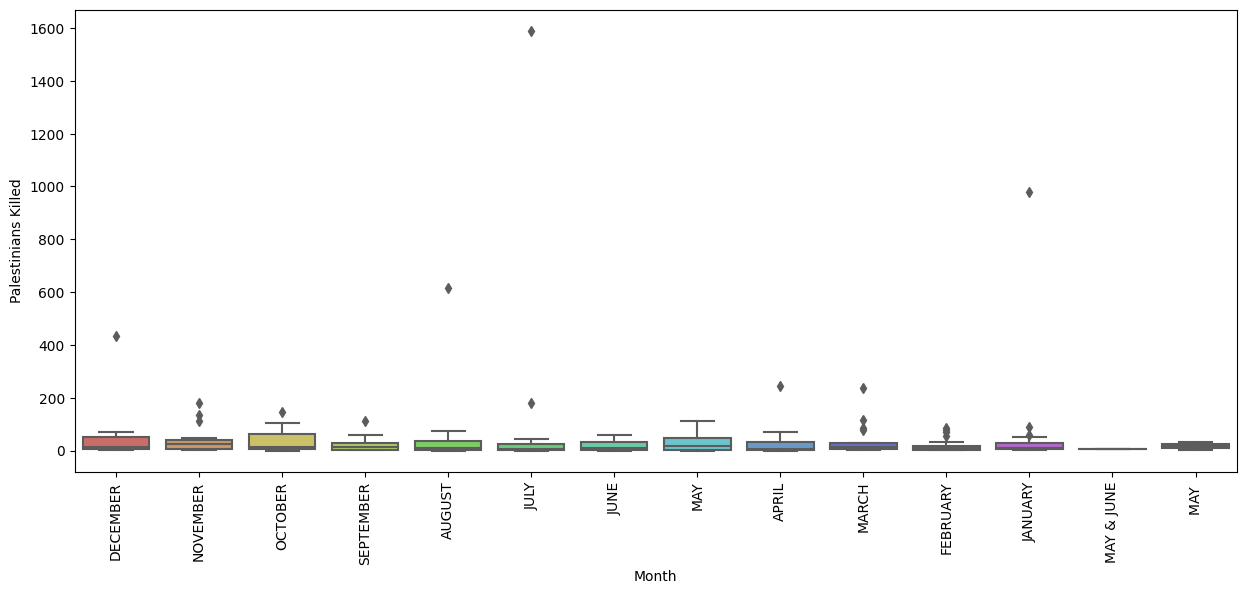

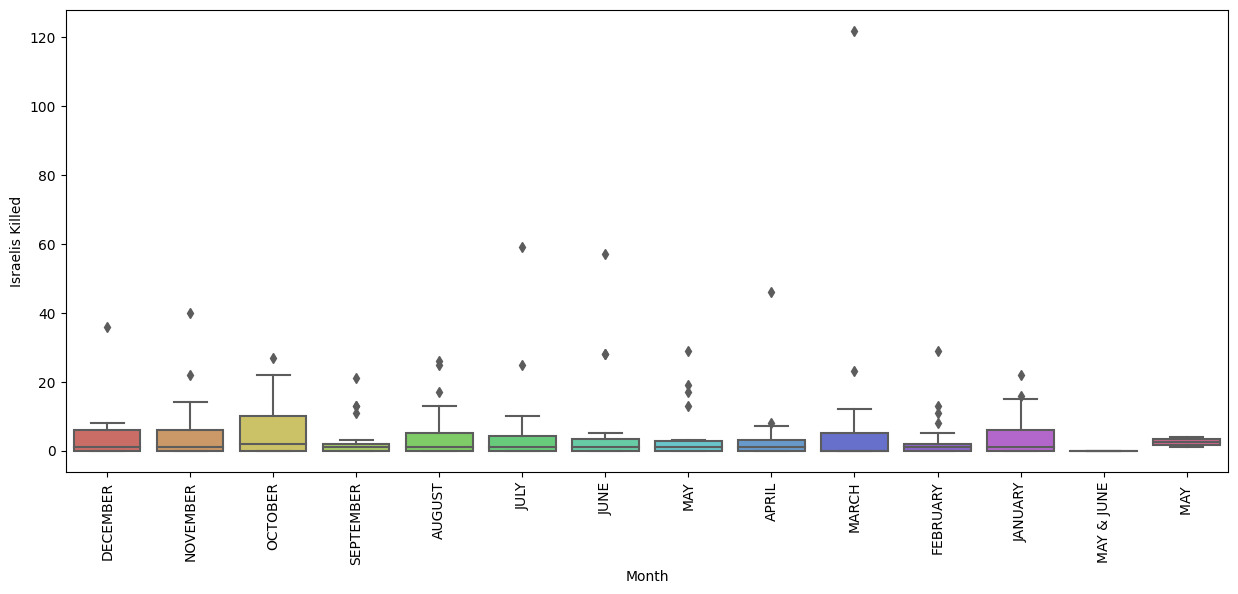

In [29]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df['Month'] , y = df1[i] , data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

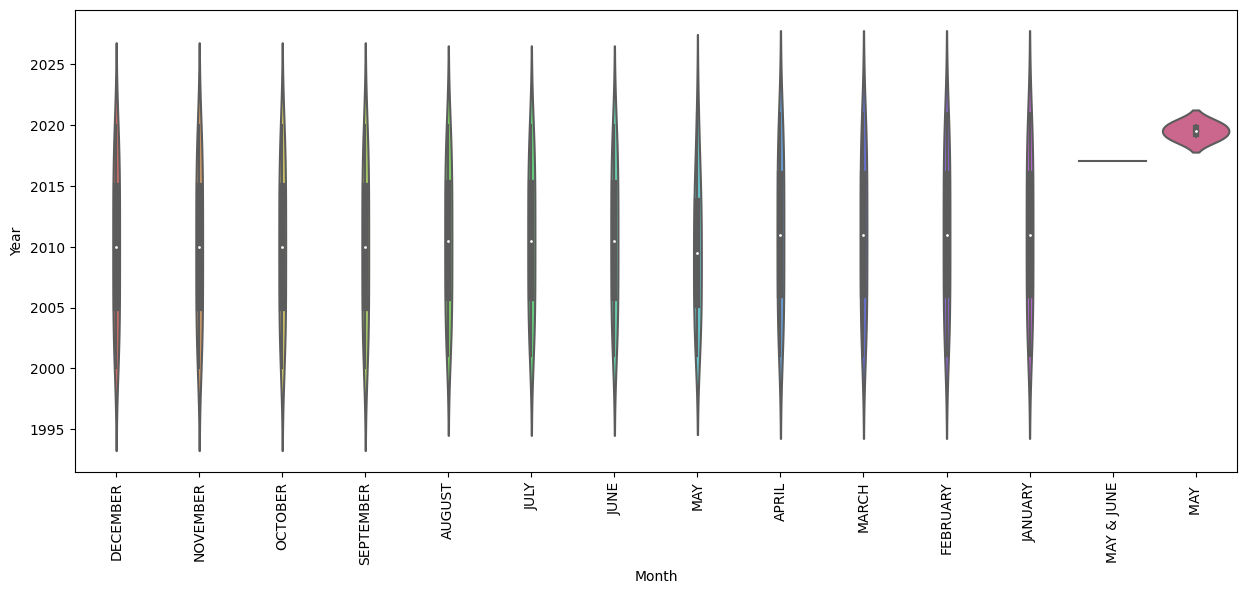

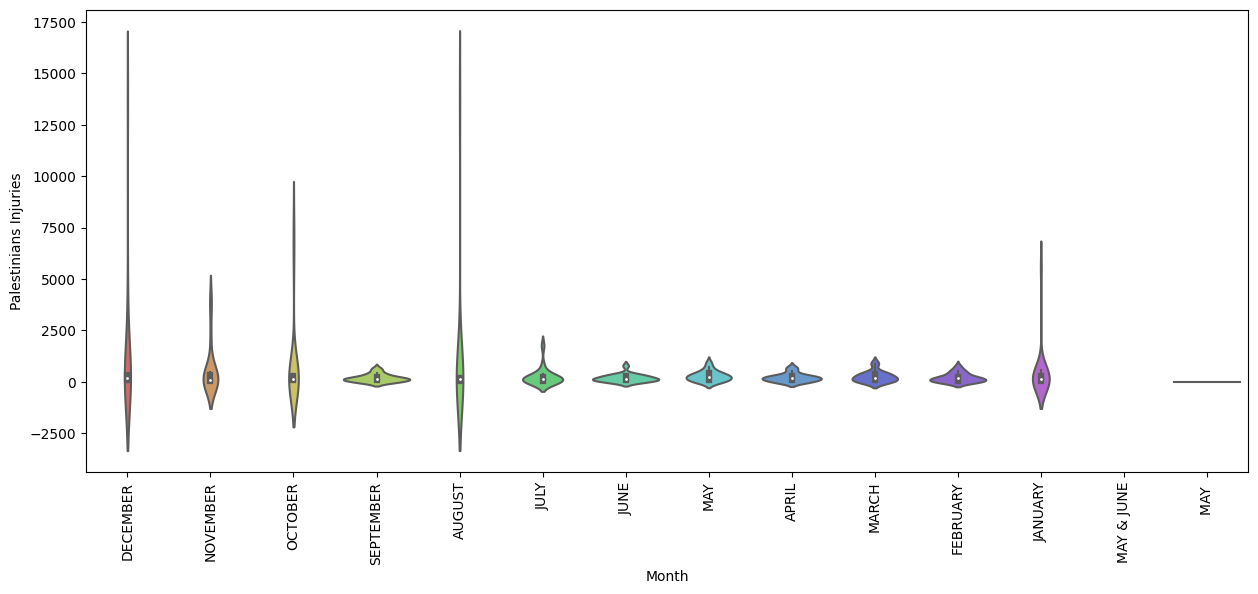

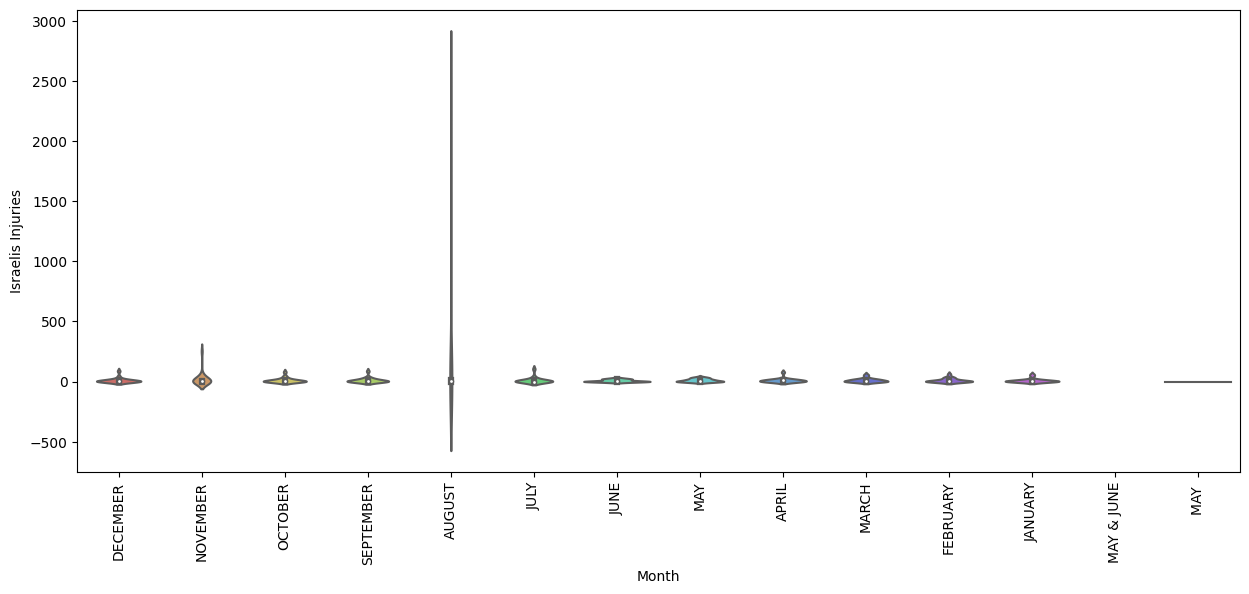

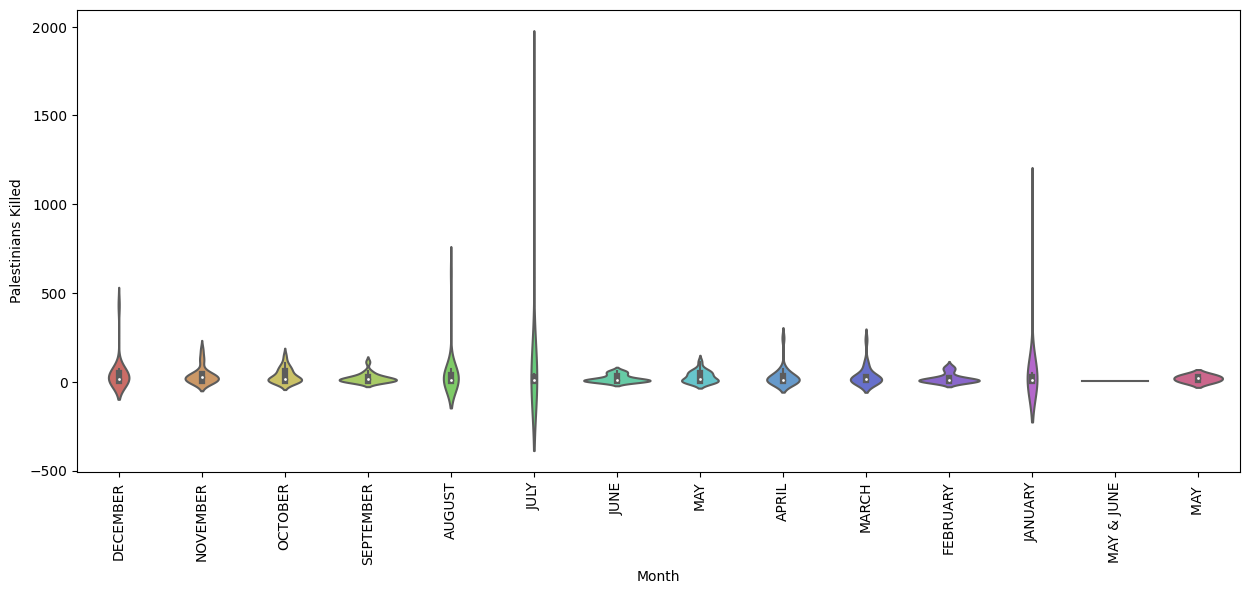

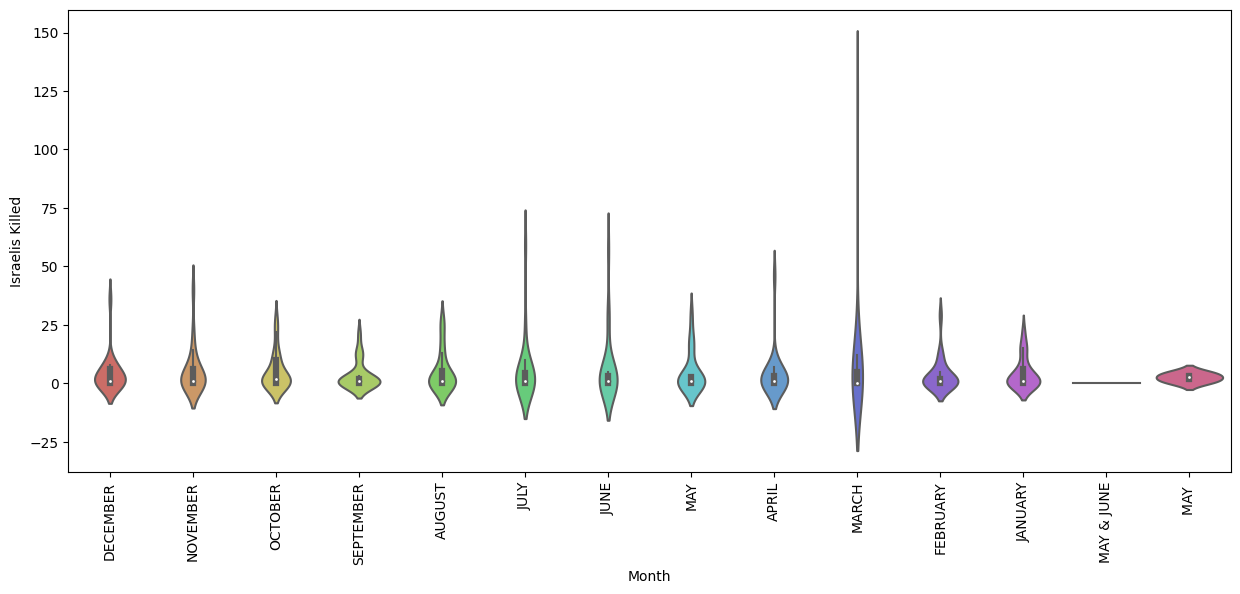

In [30]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x = df['Month'] , y = df1[i] , data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [31]:
for i in df1.columns:
    fig = px.box(df1, x=df['Month'], y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [32]:
for i in df1.columns:
    fig = px.violin(df1, x=df['Month'], y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [33]:
fig = px.line(df, x='Year', y=['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed'], title='Trends Over Years')
fig.show()

In [34]:
fig = px.line(df, x='Month', y=['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed'], title='Trends Over Months')
fig.show()

In [35]:
for i in ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']:
    fig = px.box(df, x='Month', y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

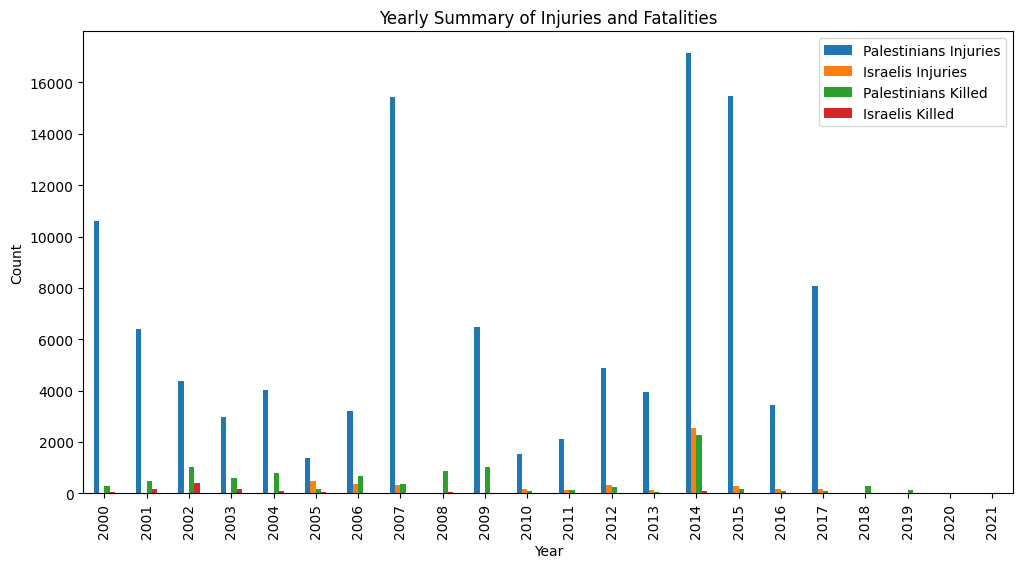

In [36]:
yearly_summary = df.groupby('Year')[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].sum()
yearly_summary.plot(kind='bar', figsize=(12, 6), title='Yearly Summary of Injuries and Fatalities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

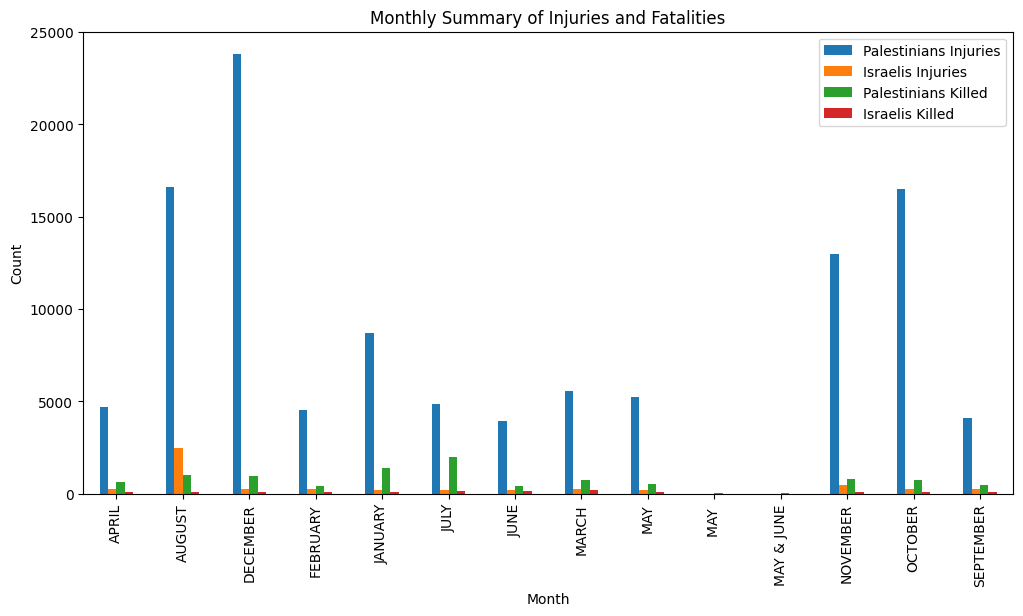

In [37]:
monthly_summary = df.groupby('Month')[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].sum()
monthly_summary.plot(kind='bar', figsize=(12, 6), title='Monthly Summary of Injuries and Fatalities')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [38]:
fig = go.Figure()

for col in yearly_summary.columns:
    fig.add_trace(go.Bar(x=yearly_summary.index, y=yearly_summary[col], name=col))

fig.update_layout(
    title='Yearly Summary of Injuries and Fatalities',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

fig.show()

In [39]:
fig = go.Figure()

for col in monthly_summary.columns:
    fig.add_trace(go.Bar(x=monthly_summary.index, y=monthly_summary[col], name=col))

fig.update_layout(
    title='Monthly Summary of Injuries and Fatalities',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

fig.show()

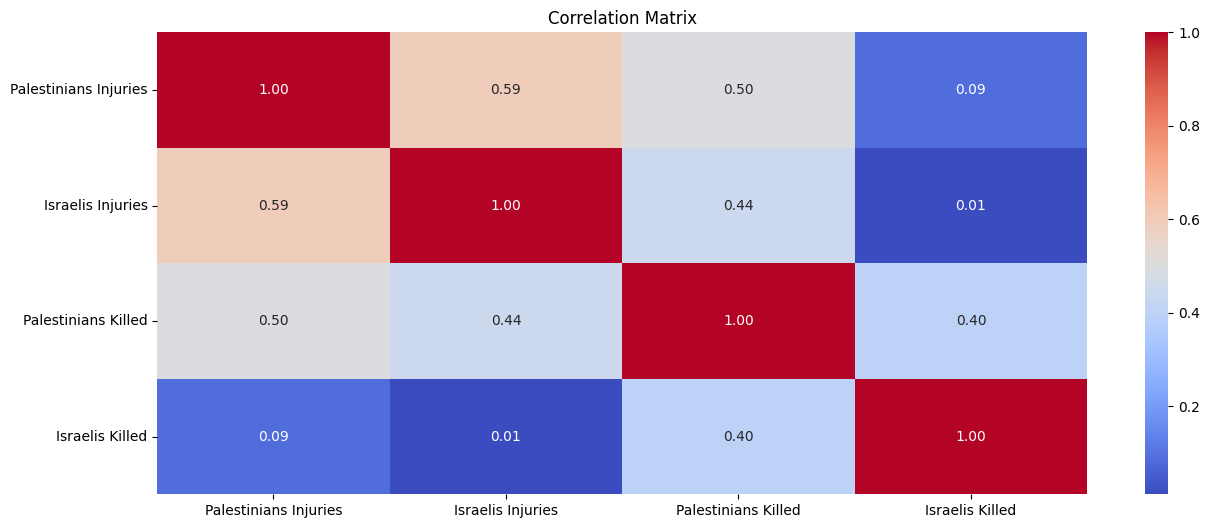

In [40]:
plt.figure(figsize=(15,6))
correlation_matrix = df[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [41]:
df['Total Incidents'] = df['Palestinians Injuries'] + df['Israelis Injuries'] + df['Palestinians Killed'] + df['Israelis Killed']
df['Palestinian Fatality Rate'] = df['Palestinians Killed'] / df['Total Incidents']
df['Israeli Fatality Rate'] = df['Israelis Killed'] / df['Total Incidents']

In [42]:
total_incidents = df['Total Incidents'].sum()
total_palestinian_incidents = df['Total Incidents'].sum()
total_israeli_incidents = df['Total Incidents'].sum()
palestinian_proportion = total_palestinian_incidents / total_incidents
israeli_proportion = total_israeli_incidents / total_incidents

In [43]:
df

Year      Month  Palestinians Injuries  Israelis Injuries  \
0    2000   DECEMBER                  781.0                0.0   
1    2000   NOVEMBER                 3838.0                0.0   
2    2000    OCTOBER                 5984.0                0.0   
3    2000  SEPTEMBER                    0.0                0.0   
4    2001   DECEMBER                  304.0                0.0   
..    ...        ...                    ...                ...   
244  2021    JANUARY                    0.0                0.0   
245  2021   FEBRUARY                    0.0                0.0   
246  2021      MARCH                    0.0                0.0   
247  2021      APRIL                    0.0                0.0   
248  2021        MAY                    0.0                0.0   

     Palestinians Killed  Israelis Killed  Total Incidents  \
0                     51                8            840.0   
1                    112               22           3972.0   
2                    104               10           6098.0   
3                     16                1             17.0   
4                     67               36            407.0   
..                   ...              ...              ...   
244                    4                0              4.0   
245                    1                0              1.0   
246                    4                0              4.0   
247                    1                0              1.0   
248                   26                3             29.0   

     Palestinian Fatality Rate  Israeli Fatality Rate  
0                     0.060714               0.009524  
1                     0.028197               0.005539  
2                     0.017055               0.001640  
3                     0.941176               0.058824  
4                     0.164619               0.088452  
..                         ...                    ...  
244                   1.000000               0.000000  
245                   1.000000               0.000000  
246                   1.000000               0.000000  
247                   1.000000               0.000000  
248                   0.896552               0.103448  

[249 rows x 9 columns]

In [44]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed', 'Total Incidents',
       'Palestinian Fatality Rate', 'Israeli Fatality Rate'],
      dtype='object')

In [45]:
df['Group'] = df.apply(lambda row: 'Palestinian' if row['Total Incidents'] <= total_palestinian_incidents else 'Israeli', axis=1)

total_incidents_by_group = df.groupby('Group')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed']].sum()
fatality_rate_by_group = df.groupby('Group')[['Palestinian Fatality Rate', 'Israeli Fatality Rate']].mean()

In [46]:
total_incidents_by_group

Total Incidents  Palestinians Killed  Israelis Killed
Group                                                             
Israeli                  0.0                 1596               59
Palestinian         126255.0                 8404             1216

In [47]:
fatality_rate_by_group

Palestinian Fatality Rate  Israeli Fatality Rate
Group                                                        
Israeli                            NaN                    NaN
Palestinian                   0.262631               0.029522

In [48]:
yearly_trends = df.groupby('Year')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed', 'Palestinian Fatality Rate', 'Israeli Fatality Rate']].mean()

In [49]:
yearly_trends

Total Incidents  Palestinians Killed  Israelis Killed  \
Year                                                          
2000      2731.750000            70.750000        10.250000   
2001       587.333333            39.166667        16.000000   
2002       486.083333            86.000000        34.916667   
2003       313.750000            49.000000        15.416667   
2004       408.250000            65.500000         8.666667   
2005       176.583333            15.833333         4.250000   
2006       355.083333            55.416667         1.666667   
2007      1345.416667            32.083333         1.000000   
2008        77.083333            73.833333         3.250000   
2009       626.333333            86.333333         0.750000   
2010       150.500000             6.833333         0.750000   
2011       196.750000             9.750000         0.833333   
2012       458.416667            21.250000         0.583333   
2013       346.583333             3.166667         0.500000   
2014      1852.636364           189.916667         7.083333   
2015      1332.750000            15.666667         2.000000   
2016       310.583333             9.583333         1.000000   
2017       759.181818             8.000000         1.583333   
2018        25.333333            24.166667         1.166667   
2019        13.333333            12.416667         0.916667   
2020         3.083333             2.833333         0.250000   
2021         7.800000             7.200000         0.600000   

      Palestinian Fatality Rate  Israeli Fatality Rate  
Year                                                    
2000                   0.261786               0.018881  
2001                   0.079316               0.034477  
2002                   0.168572               0.069055  
2003                   0.153719               0.049717  
2004                   0.163074               0.023705  
2005                   0.084600               0.021419  
2006                   0.143492               0.005107  
2007                   0.130732               0.004812  
2008                   0.845548               0.154452  
2009                   0.074554               0.002008  
2010                   0.050325               0.007751  
2011                   0.051855               0.003882  
2012                   0.035463               0.000518  
2013                   0.014054               0.001962  
2014                   0.026243               0.002840  
2015                   0.020623               0.002590  
2016                   0.033059               0.003724  
2017                   0.033434               0.012858  
2018                   0.940998               0.059002  
2019                   0.931109               0.068891  
2020                   0.934722               0.065278  
2021                   0.979310               0.020690

In [50]:
monthly_summary = df.groupby('Month')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed', 'Palestinian Fatality Rate', 'Israeli Fatality Rate']].mean()

In [51]:
monthly_summary

Total Incidents  Palestinians Killed  Israelis Killed  \
Month                                                               
APRIL            266.095238            28.809524         4.000000   
AUGUST          1010.550000            49.500000         5.150000   
DECEMBER        1194.952381            45.000000         4.095238   
FEBRUARY         250.333333            20.714286         3.619048   
JANUARY          493.190476            64.857143         4.333333   
JULY             291.526316            99.450000         6.000000   
JUNE             230.100000            19.500000         6.850000   
MARCH            319.571429            34.238095         9.190476   
MAY              335.888889            29.222222         4.944444   
MAY               21.000000            18.500000         2.500000   
MAY & JUNE              NaN             6.000000         0.000000   
NOVEMBER         682.333333            37.238095         5.380952   
OCTOBER          838.380952            36.142857         5.095238   
SEPTEMBER        232.047619            21.666667         3.380952   

            Palestinian Fatality Rate  Israeli Fatality Rate  
Month                                                         
APRIL                        0.285901               0.011376  
AUGUST                       0.200155               0.086265  
DECEMBER                     0.234496               0.032523  
FEBRUARY                     0.276699               0.020387  
JANUARY                      0.291435               0.022612  
JULY                         0.233914               0.041279  
JUNE                         0.254669               0.021041  
MARCH                        0.273422               0.025384  
MAY                          0.217345               0.021899  
MAY                          0.845946               0.154054  
MAY & JUNE                        NaN                    NaN  
NOVEMBER                     0.267773               0.015414  
OCTOBER                      0.262823               0.024661  
SEPTEMBER                    0.284830               0.021888

In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Year'], y=df['Palestinian Fatality Rate'], mode='lines', name='Palestinian Fatality Rate'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['Israeli Fatality Rate'], mode='lines', name='Israeli Fatality Rate'))
fig.update_layout(title='Fatality Rates Over Time', xaxis_title='Year', yaxis_title='Fatality Rate')
fig.show()

In [53]:
total_incidents = df['Total Incidents'].sum()
total_palestinian_incidents = df[df['Group'] == 'Palestinian']['Total Incidents'].sum()
total_israeli_incidents = df[df['Group'] == 'Israeli']['Total Incidents'].sum()
palestinian_proportion = total_palestinian_incidents / total_incidents
israeli_proportion = total_israeli_incidents / total_incidents

In [54]:
print('Total Incidents:', total_incidents)
print('Total Palestinian Incidents:', total_palestinian_incidents)
print('Total Israeli Incidents:', total_israeli_incidents)
print('Proportion of Palestinian Incidents:', palestinian_proportion)
print('Proportion of Israeli Incidents:', israeli_proportion)

Total Incidents: 126255.0
Total Palestinian Incidents: 126255.0
Total Israeli Incidents: 0.0
Proportion of Palestinian Incidents: 1.0
Proportion of Israeli Incidents: 0.0


In [55]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed', 'Total Incidents',
       'Palestinian Fatality Rate', 'Israeli Fatality Rate', 'Group'],
      dtype='object')